# ML1 Lineare Regression

## Inhaltverzeichnis

* [Laden der nötigen Module](#ldnm)
* [Explorative Datenanalyse](#ed)
* [Korrelationskoeffizient](#kk)
    * [Korrelationsmatrix](#km)
    * [Empirischer Korrelationskoeffizient](#ekk)
    * [Korrelationskoeffizient für Zufallsvariablen](#kkfz)
    * [Zusammenhang zwischen Variablen visualisieren](#zzvv)
* [Datenreduzierung und Aufteilung in Trainings- und Testdaten](#duaitut)
* [Einfache lineare Regression](#elr)
    * [Erste Schritte mit Scikit-Learn](#esmsl)
    * [Vektorisierte Formulierung der Hypothese](#vfdh)
* [Vektornormen](#vn)
    * [Axiome und Konvexität von Normen](#aukvn)
    * [Die p-Normen](#dpn)
    * [Die $L_{1}$- und $L_{2}$-Normen](#dl1ul2n)
    * [Die $L_{\infty}$- und $L_{0}$-Normen](#dliul0n)
    * [Beweis, dass die p-Normen die Axiome der Vektornormen erfüllen](#bddpndadve)
        * [Definitheit und absolute Homogenität](#duah)
        * [Dreiecksungleichung](#du)
* [Kostenfunktionen](#kf)
    * [Beweis, dass nichtnegative gewichtete Summen von Normen konvex sind](#bdngsvnks)
    * [Mean Absolute Error (MAE) und Root Mean Squared Error (RMSE)](#maeurmse)
    * [Mean Squared Error (MSE)](#mse)
        * [Wahrscheinlichkeitstheoretische Herleitung der MSE-Funktion](#whdmsef)
        * [Konvexität der MSE-Funktion](#kdmsef)
* [Die Normal Equation als analytischer Ansatz zur Parameterbestimmung](#dneaaazp)
* [Gradient Descent als iterativer Ansatz zur Parameterbestimmung](#gdaiazp)
    * [Batch Gradient Descent](#bgd)
    * [Stochastic Gradient Descent](#sgd)
    * [Mini-Batch Gradient Descent](#mbgd)
    * [Gegenüberstellung der Algorithmen](#gda)
    * [Beweis, dass der Gradient die Richtung des steilsten Aufstiegs darstellt](#bddgdrdsad)
    * [Momentum](#m)
* [Polynomenregression](#pr)
    * [Form der Hypothese](#fdh)
    * [Polynomenregression mit Scikit-Learn](#pmsl)
    * [Polynomenregression selbst implementieren](#psi)
* [Over- und Underfitting](#ouu)
    * [Zu simple vs. zu komplexe Modelle](#zsvszkm)
    * [Over- und Underfitting über Fehlermetriken detektieren](#ouuüfd)
    * [Lernkurven visualisieren](#lp)
* [Multiple lineare Regression](#mlr)
    * [Multiple lineare Regression mit Scikit-Learn](#mlrmsl)
    * [Multiple lineare Regression visualisieren](#mlrv)
    * [Multiple lineare Regression selbst implementieren](#mlrsi)

## Laden der nötigen Module <a id="ldnm"></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

%matplotlib notebook

## Explorative Datenanalyse<a id="ed"></a>

In dieser Lehreinheit werden wir uns mit dem "Boston House Prices"-Datensatz befassen. Dieser lässt sich leicht aus der Scikit-Learn-Bibliothek importieren. Die load_boston-Funktion gibt ein Dictionary zurück, über dessen Keys sich verschiedene Teile des Datensatzes und Variablenbeschreibungen aufrufen lassen.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Wir rufen zunächst einmal die allgemeine Beschreibung des Datensatzes über den DESCR-Key auf, um einen Überblick über den Datensatz zu gewinnen.

In [3]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Aus der Beschreibung können wir einige wichtige Information entnehmen: Es befinden sich $506$ Datenpunkte im Datensatz, es gibt $13$ Prädiktorvariablen und der MEDV (Median value of owner-occupied homes in $1000's) ist die zu modellierende Zielvariable.

Wir erstellen einen Pandas-Dataframe, in dem wir die Daten speichern. Diese lassen sich über den data-Key aufrufen. Über den feature_names-Key haben wir zudem Zugriff auf die Variablennamen, um die Spalten unseres Dataframes zu beschriften.

In [4]:
df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Es fehlt aber noch die Zielgröße. Diese lässt sich über den target-Key ansprechen. Wir fügen unserem Dataframe somit einfach eine neue Spalte mit den Einträgen hinter dem target-Key hinzu.

In [5]:
df["MEDV"] = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Zwar steht in der Beschreibung des Datensatzes, dass es keine fehlenden Einträge gibt, aber sicherheitshalber überprüfen wir das selbst einmal. Tatsächlich gibt es jedoch keine fehlenden Einträge.

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Über die describe-Methode gewinnen wir einen Überblick über die Variablen, die wir nun in unserem Dataframe gesammelt haben. 

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Über die hist-Methode lassen sich auch Histogramme für alle Variablen erzeugen. Auffällig ist hierbei, dass bei der MEDV-Variablen ein Deckeneffekt vorzuliegen scheint.

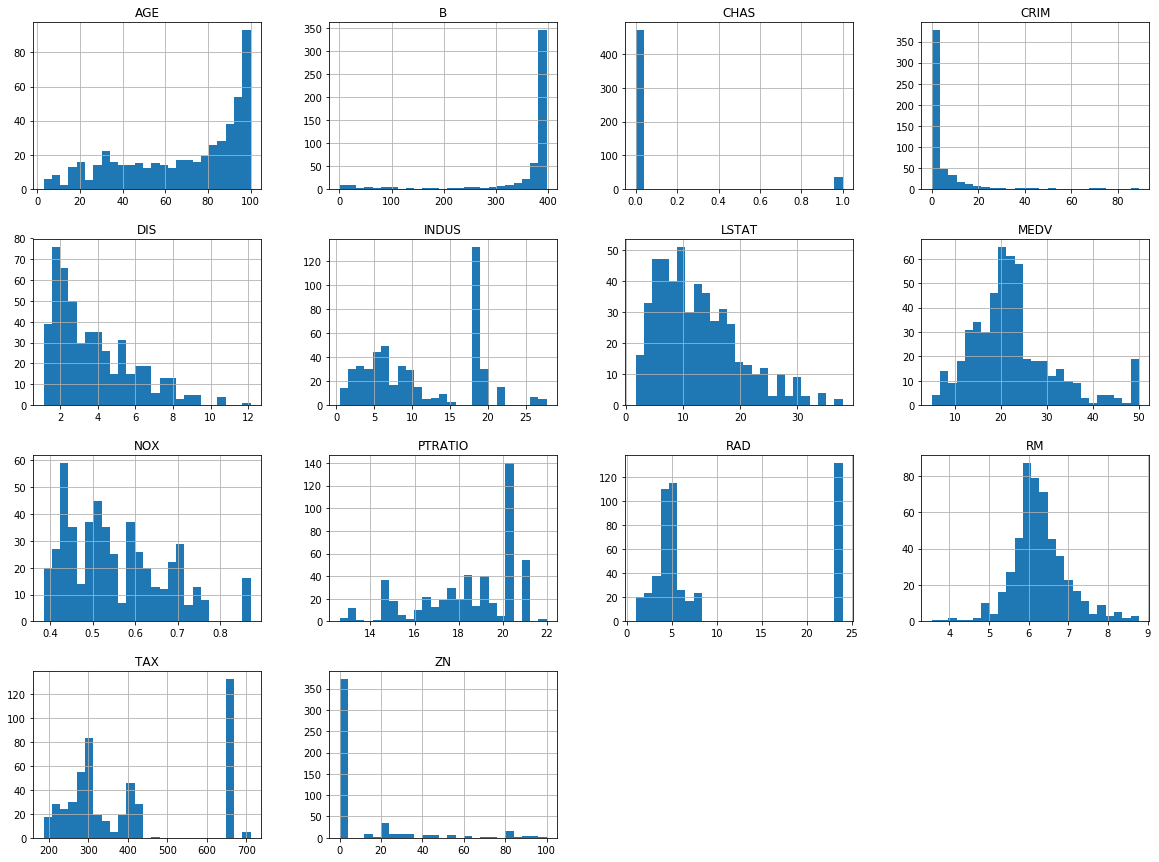

In [8]:
df.hist(bins = 25, figsize = (20,15));

## Korrelationskoeffizient

### Korrelationsmatrix

Der Korrelationskoeffizient (oft auch "Pearson-Korrelationskoeffizient" genannt) ist ein Maß für den linearen Zusammenhang zweier (mindestens intervallskalierter) Variablen. Hierbei ist der Korrelationskoeffizient auf das Intervall $[-1, 1]$ beschränkt, wobei er folgendermaßen zu interpretieren ist:

- Bei einem Wert von $+1$ bzw. $-1$ liegt ein vollständig positiver bzw. linearer Zusammenhang zwischen den beiden betrachteten Variablen vor.
- Bei einem Wert von 0 liegt kein linearer Zusammenhang vor. Das heißt allerdings nicht, dass die Variablen nicht voneinander abhängen können. Ein nichtlinearer Zusammenhang wäre auch denkbar.

Mithilfe einer Korrelationsmatrix können wir uns einen Überblick darüber verschaffen, welche der erhobenen Variablen mit der Zielgröße MEDV linear zusammenhängen. Variablen, die stark mit MEDV korrelieren, können wir anschließend als Prädiktoren für unsere linearen Regressionsmodelle verwenden.

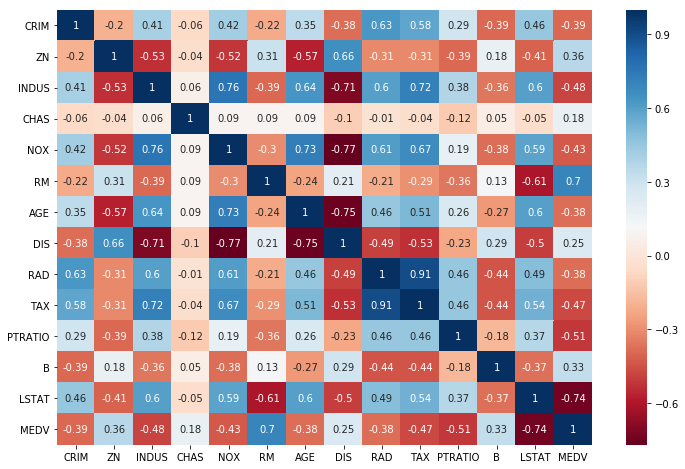

In [9]:
plt.figure(figsize = (12, 8))

korrelationsmatrix = df.corr().round(2)
sns.heatmap(korrelationsmatrix, annot = True, cmap = "RdBu");

Gute Kandidaten sind hierbei LSTAT (Koeffizient der Korrelation mit MEDV $= -0.74$) und RM (Koeffizient der Korrelation mit MEDV $= 0.7$).

### Empirischer Korrelationskoeffizient

Doch wie errechnet sich der Korrelationskoeffizient? 

Zunächst einmal gehen wir davon aus, dass eine Reihe von gepaarten Messungen $(u^{(1)},v^{(1)}), (u^{(2)},v^{(2)}),...,(u^{(m)},v^{(m)})$ vorliegt. Der empirische Korrelationskoeffizient $r$ errechnet sich nun aus der Kovarianz der Messungen der zwei Variablen geteilt durch das Produkt der Standardabweichungen der Messungen beider Variablen.

$$r_{u,v}:=\frac{\sum_{i=1}^{m}\left[(u^{(i)}-\mu_u)(v^{(i)}-\mu_v)\right]}{\sqrt{\sum_{i=1}^{m}{(u^{(i)}-\mu_u)}^2}\sqrt{\sum_{i=1}^{m}{(v^{(i)}-\mu_v)}^2}}=\frac{Cov(u, v)}{\sigma_u\sigma_v}$$

Dabei sind $\mu_u$ und $\mu_v$ die Mittelwerte der Messungen der Variablen:

$$\mu_u=\frac{\sum_{i=1}^{m}u^{(i)}}{m},\hspace{0.2cm}\mu_v=\frac{\sum_{i=1}^{m}v^{(i)}}{m}$$

Da im Machine Learning-Kontext Messungen in aller Regel in Arrays gespeichert sind, bietet sich auch eine vektorisierte Betrachtungsweise des Korrelationskoeffizienten an. Hierbei gehen wir davon aus, dass uns die gepaarten Messungen als Vektoren $\vec{u}$ und $\vec{v}$ vorliegen, wobei der $i$-te Eintrag des einen Vektors mit dem $i$-ten Eintrag des anderen Vektors gepaart ist:

$$\vec{u}=\left[\begin{matrix}u^{(1)}\\u^{(2)}\\\vdots\\u^{(m)}\\\end{matrix}\right],\hspace{0.3cm}\vec{v}=\left[\begin{matrix}v^{(1)}\\v^{(2)}\\\vdots\\v^{(m)}\\\end{matrix}\right]\in\mathbb{R}^m$$
 
Dadurch ist der Korrelationskoeffizient über mehrere Skalarprodukte berechenbar:

$$r_{u,v}=\frac{(\vec{u}-\mu_u)^{T}(\vec{v}-\mu_v)}{\sqrt{(\vec{u}-\mu_u)^{T}(\vec{u}-\mu_u)}\sqrt{(\vec{v}-\mu_v)^{T}(\vec{v}-\mu_v)}}$$

In [10]:
def pearson_r(x, y):
    
    assert len(x) == len(y)
    xdiff = x - np.mean(x)
    ydiff = y - np.mean(y)
    cov = xdiff.dot(ydiff)
    return round(cov / (np.sqrt(xdiff.dot(xdiff)) * np.sqrt(ydiff.dot(ydiff))), 2)

print("r(RM, MEDV): ", pearson_r(df["RM"], df["MEDV"]))
print("r(LSTAT, MEDV): ", pearson_r(df["LSTAT"], df["MEDV"]))

r(RM, MEDV):  0.7
r(LSTAT, MEDV):  -0.74


### Korrelationskoeffizient für Zufallsvariablen

Wenn wir den Korrelationskoeffizient nun nicht für empirische Messungen, sondern stattdessen allgemein für zwei Zufallsvariablen betrachten, so können wir uns einige der fundamentalen Eigenschaften des Korrelationskoeffizienten herleiten.

Zunächst einmal ist der Korrelationskoeffizient für zwei Zufallsvariablen analog zum empirischen Korrelationskoeffizienten definiert, bloß eben mit zwei Zufallsvariablen $U$ und $V$ als Ausgangspunkt:

$$\rho_{U,V}:=\frac{Cov(U,V)}{\sigma_U\sigma_V}=\frac{Cov(U,V)}{\sqrt{Var(U)}\sqrt{Var(V)}}$$

Seien $\widetilde{U}=\frac{U}{\sigma_U}$ und $\widetilde{V}=\frac{V}{\sigma_V}$ die standardisierten Zufallsvariablen, so zeigt sich durch die Linearität der Kovarianz, dass der Korrelationskoeffizient als Kovarianz der standardisierten Zufallsvariablen $\widetilde{U}$ und $\widetilde{V}$ betrachtet werden kann:

$$Cov(\widetilde{U},\widetilde{V})=Cov\left(\frac{U}{\sigma_U},\frac{V}{\sigma_V}\right)=\frac{Cov(U,V)}{\sigma_U\sigma_V}=\rho_{U,V}$$

Seien die Standardabweichungen der Zufallsvariablen positiv, d.h. $\sigma_U >0 ∧ \sigma_V >0$, dann heißen $U, V$ unkorreliert, d.h. $\rho_{U,V}=0$, falls $Cov(U,V)=0$ gilt:

$$\rho_{U,V}=\frac{Cov(U,V)}{\sigma_U\sigma_V}=0⇒Cov(U,V)=0$$

Betrachtet man den Korrelationskoeffizient einer Zufallsvariablen mit sich selbst, so ergibt sich ein Korrelationskoeffizient von 1:

$$\rho_{U,U}=\frac{Cov(U,U)}{\sigma_U^2}=\frac{Var(U)}{Var(U)}=1$$

Es folgt nun der Beweis, dass $\left|\rho\right|\le1$:

Sei $t\in\mathbb{R}$

### Zusammenhang zwischen Variablen visualisieren

Nun haben wir zwar ein quantitatives Maß für den linearen Zusammenhang zweier Variablen, aber es schadet nie, diesen Zusammenhang mittels Streudiagrammen zu visualisieren. 

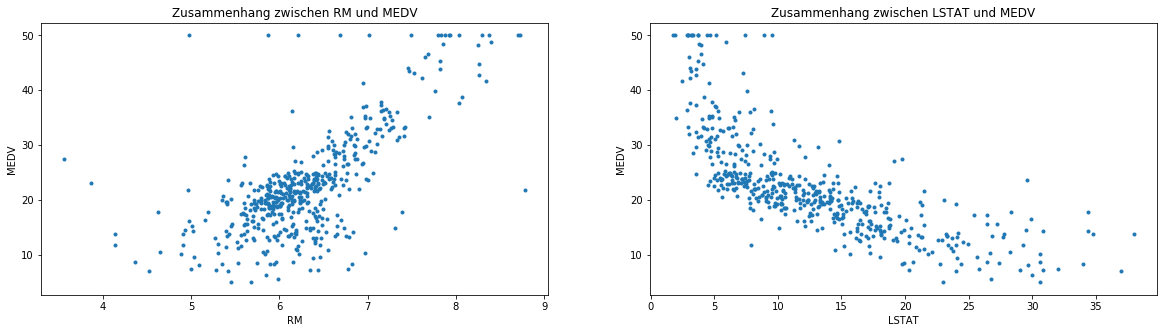

In [11]:
features = ["RM", "LSTAT"]
target = df["MEDV"]

plt.figure(figsize = (20, 5))
    
for index, column in enumerate(features):
    plt.subplot(1, len(features), index + 1)
    x = df[column]
    y = target
    plt.scatter(x, y, marker = ".")
    plt.title(f"Zusammenhang zwischen {column} und MEDV")
    plt.xlabel(column)
    plt.ylabel("MEDV")

Hierbei fällt auf, dass zwar der Zusammenhang zwischen RM und MEDV recht linear aussieht, der Zusammenhang zwischen LSTAT und MEDV hingegen erscheint aber eher quadratisch. Ferner wird hier der zuvor beschriebene Deckeneffekt der MEDV-Variable deutlich: Bei der Datenerhebung wurden MEDV-Werte $> 50$ vermutlich auf $50$ reduziert. Wie man mit solchen Umständen umgeht, hängt von der konkreten Untersuchungssituation ab. Weil wir hier Vorhersagen einer stetigen Zielgröße vornehmen möchten, werden wir den Datensatz im nächsten Schritt von diesem Deckeneffekt befreien. 

## Datenreduzierung und Aufteilen in Trainings- und Testdaten

Wir entfernen alle Einträge im Dataframe, bei denen die Zielgröße einen Wert von $50$ aufweist. Dadurch verlieren wir zwar $16$ unserer Datenpunkte, aber dafür gibt es keinen Deckeneffekt mehr, den unsere Regressionsmodelle lernen könnten.

In [12]:
df_reduced = df.drop(df[df["MEDV"] == 50].index)
print(df_reduced.shape)

(490, 14)


Ferner reduzieren wir unseren Datensatz auf diejenigen Variablen, mit denen wir unsere Regressionsmodelle trainieren und testen werden. Für unsere Zwecke reichen die beiden Prädiktoren RM und LSTAT und die Zielgröße MEDV.

In [13]:
data = df_reduced[["RM", "LSTAT", "MEDV"]]
data.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


Wir trainieren unsere Modelle nur mit einem Teil der vorhandenen Daten. Die restlichen Beobachtungen verwenden wir zur Modellvalidierung, d.h. wir prüfen damit, wie gut unsere Modelle Datenpunkte vorhersagen können, die sie nicht während der Trainingsphase gesehen haben. 

Hierfür teilen wir die Daten in einen Trainings- und einen Testdatensatz. Bei kleinen Datensätzen wie dem hier vorliegenden bietet sich eine Verteilung von $80\%$ Trainingsdaten zu $20\%$ Testdaten an.

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 0)

print(train.shape)
print(test.shape)

(392, 3)
(98, 3)


## Einfache lineare Regression

### Erste Schritte mit Scikit-Learn

Im Allgemeinen versuchen wir beim Aufstellen eines Regressionsmodell, den Zusammenhang einer stetigen Zielgröße mit einem oder mehreren Prädiktor(en) zu modellieren. Bei einem einfachen Regressionsproblem liegt uns ein Datensatz folgender Form vor:

$$\left\{(x^{(i)},y^{(i)})\ \middle|\hspace{0.1cm}y^{(i)}\in\mathbb{R},\hspace{0.1cm} i=1,...,m\right\}$$

Das heißt unser Datensatz ist eine Menge von $m$ gepaarten Messungen *eines* Prädiktors und der stetigen Zielgröße. Für das einfache lineare Regressionsmodell, das wir im Folgenden aufstellen werden, ist RM der Prädiktor und MEDV die Zielgröße.

In [15]:
X_train = np.array(train["RM"]).reshape(train["RM"].size, 1)
y_train = np.array(train["MEDV"]).reshape(train["MEDV"].size, 1)

X_test = np.array(test["RM"]).reshape(test["RM"].size, 1)
y_test = np.array(test["MEDV"]).reshape(test["MEDV"].size, 1)

Bei einer einfachen linearen Regression unterstellen wir einen annähernd inearen Zusammenhang zwischen der Zielgröße und dem Prädiktor, d.h. die $i$-te Messung der Zielgröße lässt sich annähernd als lineare Transformation der $i$-ten Messung des Prädiktors beschreiben. Hierbei gehen wir von zwei festen Koeffizienten $\theta_{0}$ und $\theta_{1}$ aus, die den annähernd linearen Zusammenhang zwischen dem Prädiktor und der Zielgröße über alle Messungen hinweg beschreiben. Da wir nicht von einem vollständigen linearen Zusammenhang zwischen dem Prädiktor und der Zielgröße ausgehen, d.h. $\left|r_{x,y}\right|<1$, rechnen wir mit einem Fehler $\varepsilon^{(i)}$, den wir bei jeder Messung $i$ mit einem linearen Modell machen werden:

$$y^{(i)}=\theta_0+\theta_1x^{(i)}+\varepsilon^{(i)}$$

Um diesen quasi-linearen Zusammenhang zu modellieren, stellen wir eine Hypothese $h$ auf. Bei $h$ handelt es sich um eine Funktion, die einen reellwertigen Prädiktor $x$ auf eine reellwärtige Schätzung der Zielgröße abbildet. Diese Schätzung bezeichnen wir als $\hat{y}$:

$$h:\mathbb{R}\rightarrow\mathbb{R},\ \ x\mapsto\hat{y}$$

Für jede Messung $i$ nimmt unsere Hypothese als Argument also den Prädiktor $x^{(i)}$ und über die Parameter $\theta_0$ und $\theta_1$ erfolgt die lineare Transformation des Prädiktors in eine Schätzung $\hat{y}^{(i)}$:

$$h(x^{(i)};\theta_0,\theta_1)=\theta_0+\theta_1x^{(i)}={\hat{y}}^{(i)}$$

Dabei hoffen wir, dass unsere Schätzung nah am tatsächlichen Wert der Zielgröße liegt:

$${\hat{y}}^{(i)}\approx y^{(i)}$$

Scikit-Learn erlaubt ein komfortables Aufstellen eines solchen linearen Modells mit nur wenigen Zeilen Code.

- Als Erstes wird das gewünschte Modell aus der Bibliothek importiert
- Anschließend wird eine Instanz des Modells mit den gewünschten Parametern erzeugt
- Abschließend wird die fit-Methode des Modells aufgerufen, wobei die Trainingsdaten als Eingabeparameter überführt werden

In [16]:
from sklearn.linear_model import LinearRegression

modell = LinearRegression(fit_intercept = True)
modell.fit(X_train, y_train)

print("Y-Achsenabschnitt: ", round(modell.intercept_[0], 3))
print("Koeffizient: ", round(modell.coef_[0][0], 3))

Y-Achsenabschnitt:  -30.281
Koeffizient:  8.314


Wir sehen anhand der obigen Ausgabe, dass das lineare Modell die Parameter $\theta_{0}=-30.281$ und $\theta_{1}=8.314$ gelernt hat. 

Wir können nun unser lineares Modell visualisieren und überprüfen, ob es augenscheinlich den Zusammenhang von RM und MEDV adäquat einfängt.

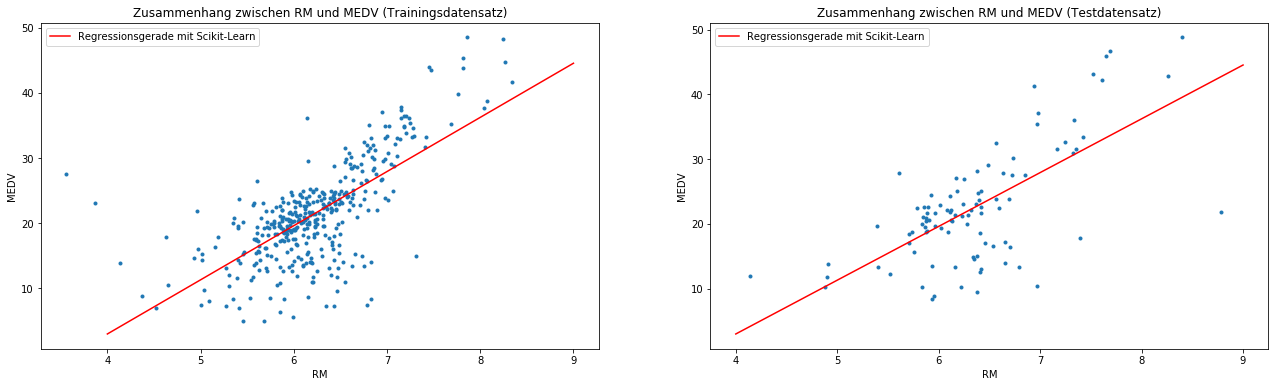

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

x_ = np.arange(4, 10).reshape(6, 1)
y_ = modell.predict(x_)

ax1.scatter(train["RM"], train["MEDV"], marker = ".", label = None)
ax1.plot(x_, y_, color = "red", label = "Regressionsgerade mit Scikit-Learn")
ax2.scatter(test["RM"], test["MEDV"], marker = ".", label = None)
ax2.plot(x_, y_, color = "red", label = "Regressionsgerade mit Scikit-Learn")

ax1.set_title("Zusammenhang zwischen RM und MEDV (Trainingsdatensatz)")
ax2.set_title("Zusammenhang zwischen RM und MEDV (Testdatensatz)")
ax1.set_xlabel("RM"); ax2.set_xlabel("RM")
ax1.set_ylabel("MEDV"); ax2.set_ylabel("MEDV")
ax1.legend(); ax2.legend();

Und tatsächlich scheint die Regressionsgerade eine angemessene Schätzung des Verhältnisses zwischen RM und MEDV anzubieten. Aber ist die vorgeschlagene Gerade das optimale lineare Modell für den Zusammenhang des Prädiktors und der Zielgröße? Scikit-Learn verwendet eine analytische Methode, um das optimale Parameterpaar $(\theta_{0},\theta_{1})$ zu lernen. Es gibt also keine Gerade, die die quadrierten Abweichungen zwischen den Schätzungen $\hat{y}$ und $y$ besser minimiert als die von Scikit-Learn ermittelte. Wir werden in den folgenden Abschnitten ergründen, wieso das Minimieren von quadrierten Abweichungen das Optimierungskriterium ist und wir werden eigene Implementationen entwickeln, die aufzeigen, wie man selbst an die optimalen Parameter kommt oder wie man diese zumindest abschätzen kann, falls der Rechenaufwand für eine optimale Lösung nicht tragbar sein sollte.

Zwar ist das hier aufgestellte lineare Modell das bestmögliche lineare Modell für die Abbildung des Zusammenhangs zwischen RM und MEDV, aber nichtsdestotrotz weichen die Datenpunkte von unserer Regressionsgerade ab. Wir sprechen von Schätzungsfehlern $\hat{\varepsilon}$, die wir in einem Fehlervektor $\vec{\varepsilon}$ speichern können:

$$\vec{\varepsilon}=\left[\begin{matrix}{\hat{y}}^{(1)}-y^{(1)}\\{\hat{y}}^{(2)}-y^{(2)}\\\vdots\\{\hat{y}}^{(m)}-y^{(m)}\\\end{matrix}\right]\ =\left[\begin{matrix}{\hat{\varepsilon}}^{(1)}\\{\hat{\varepsilon}}^{(2)}\\\vdots\\{\hat{\varepsilon}}^{(m)}\\\end{matrix}\right]\ \in\mathbb{R}^m$$

In [18]:
epsilon_train = modell.predict(X_train) - y_train
epsilon_test = modell.predict(X_test) - y_test

### Vektorisierte Formulierung der Hypothese

Wie schon beim Korrelationskoeffizienten gibt es eine Möglichkeit, eine vektorisierte Version unserer Hypothese zu implementieren. Gerade bei einer linearen Funktion bietet sich das Ermitteln einer Schätzung ${\hat{y}}^{\left(i\right)}$ als Skalarprodukt eines Gewichtsvektors $\vec{\theta}$ mit einem Inputvektor $\vec{x}^{(i)}$ an. Dadurch, dass der Gewichtsvektor $\vec{\theta}$ und der Inputvektor $\vec{x}^{(i)}$ nicht der gleichen Dimension sind, ist aber die Berechnung eines Skalarprodukts dieser beiden Vektoren nicht ohne Weiteres möglich. Abhilfe kann man sich allerdings verschaffen, indem man einen zusätzlichen "Prädiktor" $x_0^{(i)}=1$ in die lineare Hypothese inkludiert:

$$h\left({\vec{x}}^{\left(i\right)};\vec{\theta}\right)=\theta_0x_0^{\left(i\right)}+\theta_1x_1^{\left(i\right)}={\hat{y}}^{\left(i\right)}$$

$x_0^{(i)}=1$ tragen wir nun auch in unseren Inputvektor $\vec{x}^{(i)}$ ein, sodass der Input- und der Gewichtsvektor der gleichen Dimension sind:

$$\hspace{0.2cm}{\vec{x}}^{(i)}=\left[\begin{matrix}x_0^{(i)}=1\\x_1^{(i)}\\\end{matrix}\right],\hspace{0.2cm}\vec{\theta}=\left[\begin{matrix}\theta_0\\\theta_1\\\end{matrix}\right]\in\mathbb{R}^2$$

Nun ist es uns möglich, die lineare Hypothese als Skalarprodukt umzuformulieren:

$$h({\vec{x}}^{(i)};\vec{\theta})=\sum_{j=0}^{1}\theta_jx_j^{(i)}={\vec{\theta}}^T{\vec{x}}^{(i)}$$

Natürlich können wir auch für den Fall verallgemeinern, dass $n\in\mathbb{N^+}$ Prädiktoren vorliegen:

$$h\left({\vec{x}}^{\left(i\right)};\vec{\theta}\right)=\theta_0x_0^{\left(i\right)}+\theta_1x_1^{\left(i\right)}+\theta_2x_2^{\left(i\right)}+\ldots+\theta_nx_n^{\left(i\right)}={\hat{y}}^{\left(i\right)}$$

In diesem Fall ist eine Formulierung unserer linearen Hypothese als Skalarprodukt zweier Vektoren der Länge $n+1$ möglich:

$$h\left({\vec{x}}^{\left(i\right)};\vec{\theta}\right)=\sum_{j=0}^{n}\theta_jx_j^{(i)}={\vec{\theta}}^T{\vec{x}}^{(i)},\hspace{0.2cm}\vec{x},\vec{\theta} \in\mathbb{R}^{n+1}$$

In der vektorisierten Formulierung unserer Hypothese ist $h$ also eine Funktion, die einen Vektor $\vec{x}$ der Länge $n+1$ auf eine reelle Zahl $\hat{y}$ abbildet:

$$h:\mathbb{R}^{n+1}\rightarrow\mathbb{R},\ \ \vec{x}\mapsto\hat{y}$$

Bisher haben wir nur von Einzelschätzungen gesprochen. Wir können aber unsere $m$ Inputvektoren $\vec{x}^{(1)},...,\vec{x}^{(m)}$ in einer Inputmatrix $X$ sammeln:

$$X=\left[\begin{matrix}{{\vec{x}}^{(1)T}}\\{{\vec{x}}^{(2)T}}\\\vdots\\{{\vec{x}}^{(m)T}}\\\end{matrix}\right]\in\mathbb{R}^{m\ \times\ n+1}$$

Der Vorteil daran ist, dass über eine einzelne Matrizenmultiplikation ein kompletter Schätzungsvektor erzeugt werden kann:

$$X\vec{\theta}=\left[\begin{matrix}{{\vec{x}}^{\left(1\right)T}}\vec{\theta}\\{{\vec{x}}^{\left(2\right)T}}\vec{\theta}\\\vdots\\{{\vec{x}}^{\left(m\right)T}}\vec{\theta}\\\end{matrix}\right]=\left[\begin{matrix}{\hat{y}}^{\left(1\right)}\\{\hat{y}}^{\left(2\right)}\\\begin{matrix}\vdots\\{\hat{y}}^{\left(m\right)}\\\end{matrix}\\\end{matrix}\right]\in\mathbb{R}^m$$

Der somit erzeugte Schätzvektor hat die gleiche Länge wie der Vektor $\vec{y}$:

$$\vec{y}=\left[\begin{matrix}y^{(1)}\\y^{(2)}\\\vdots\\y^{(m)}\\\end{matrix}\right]\in\mathbb{R}^m$$

Wir können also wie im vorherigen Abschnitt einen Fehlervektor $\vec{\varepsilon}$ erzeugen:

$$X\vec{\theta}-\vec{y}=\left[\begin{matrix}{{\vec{x}}^{\left(1\right)T}}\vec{\theta}\\{{\vec{x}}^{\left(2\right)T}}\vec{\theta}\\\vdots\\{{\vec{x}}^{\left(m\right)T}}\vec{\theta}\\\end{matrix}\right]-\left[\begin{matrix}y^{\left(1\right)}\\y^{\left(2\right)}\\\vdots\\y^{\left(m\right)}\\\end{matrix}\right]=\left[\begin{matrix}{\hat{y}}^{(1)}-y^{(1)}\\{\hat{y}}^{(2)}-y^{(2)}\\\vdots\\{\hat{y}}^{(m)}-y^{(m)}\\\end{matrix}\right]\ =\left[\begin{matrix}{\hat{\varepsilon}}^{(1)}\\{\hat{\varepsilon}}^{(2)}\\\vdots\\{\hat{\varepsilon}}^{(m)}\\\end{matrix}\right]=\vec{\varepsilon}\in\mathbb{R}^m$$

## Vektornormen

### Axiome und Konvexität von Normen

Eine Norm ist eine Funktion, die vom Vektorraum $\mathbb{R}^n$ auf die Menge der nichtnegativen reellen Zahlen abbildet.

$$||·||:\mathbb{R}^n\rightarrow\mathbb{R}_0^+,\hspace{0.2cm}\vec{v}\mapsto||\vec{v}||$$

Ferner gelten folgende Axiome für Normen:

1. $\forall\vec{v}\in\mathbb{R}^n:||\vec{v}||=0\Rightarrow\vec{v}=0\hspace{0.2cm}$(Definitheit)
2. $\forall\vec{v}\in\mathbb{R}^n,\lambda\in\mathbb{R}∶||\lambda·\vec{v}||=\left|\lambda\right|·||\vec{v}||\hspace{0.2cm}$(Absolute Homogenität)
3. $\forall\vec{u},\vec{v}\in\mathbb{R}^n:||\vec{u}+\vec{v}||\le||\vec{u}||+||\vec{v}||\hspace{0.2cm}$(Dreiecksungleichung)

Eine Funktion $f:\mathbb{R}^n\rightarrow\mathbb{R}$ heißt konvex $:\Leftrightarrow\forall\vec{u},\vec{v}\in\ \mathbb{R}^n,\lambda\in[0,1]:f(\lambda\vec{u}+(1-\lambda)\vec{v})\le\lambda\ f(\vec{u})+(1-\lambda)f(\vec{v})$

Aus der Dreiecksungleichung und der absoluten Homogenität geht die Konvexität von Normen hervor:

$$\forall\vec{u},\vec{v}\in\mathbb{R}^n,\lambda\in[0,1]:||\lambda\vec{u}+(1-\lambda)\vec{v}||\le||\lambda\vec{u}||+||(1-\lambda)\vec{v}||=\lambda||\vec{u}||+(1-\lambda)||\vec{v}||$$

### Die p-Normen

Mit Vektornormen können wir gewisse Informationen aus einem Vektor extrahieren, was besonders für die zuvor erzeugten Fehlervektoren $\vec{\varepsilon}$ von Interesse sein wird. Die gängingste Klasse von Vektornormen sind die sogenannten p-Normen, die folgende allgemeine Form haben:

$$||\vec{v}||_{p}:=\left(\sum_{i=1}^{m}\left|{{v}}^{(i)}\right|^p\right)^\frac{1}{p},\hspace{0.4cm}\vec{v}=\left[\begin{matrix}v^{(1)}\\\begin{matrix}v^{(2)}\\\vdots\\\end{matrix}\\v^{(m)}\\\end{matrix}\right]$$

(Der Beweis, dass die p-Normen die Axiome erfüllen, folgt in einem späteren Abschnitt.)

### Die $L_{1}$- und $L_{2}$-Normen

Setzt man in die p-Normen $p=1$ ein, so erhält man die $L_1$-Norm, die die Summe der Absolutbeträge eines Vektors ausgibt:

$$||\vec{v}||_{1}=\sum_{i=1}^{m}\left|{v}^{(i)}\right|$$

Manchmal wird die $L_1$-Norm auch als "Manhattan-Metrik" bezeichnet, da die $L_1$-Norm den Abstand zwischen zwei Punkten als die Summe der absoluten Einzelkoordinaten auffasst, man sich also nur auf orthogonalen Bahnen bewegen kann, um von Punkt A zu Punkt B zu gelangen.

In [19]:
def l1(vector):
        return np.sum(np.abs(vector))

print("L1-Norm des Trainingsfehlervektors: ", round(l1(epsilon_train), 2))
print("L1-Norm des Testfehlervektors: ", round(l1(epsilon_test), 2))

L1-Norm des Trainingsfehlervektors:  1538.4
L1-Norm des Testfehlervektors:  473.88


Im Folgenden wird die $L_1$-Norm für zwei Koordinaten $x$ und $y$ visualisiert. Man beachte, dass die diamantartige Form der $L_1$-Norm nur ein Minimum hat. Dieses Minimum ist gleichzeitig auch das globale Minimum.

In [20]:
def plot_norm(norm):

    x = np.linspace(-1, 1, 30)
    y = np.linspace(-1, 1, 30)

    X, Y = np.meshgrid(x, y)
    Z = norm(X, Y)

    fig = plt.figure(figsize=(11,6))
    ax  = plt.axes(projection = "3d")
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="bwr", edgecolor="none")
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.zaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel("||[x,y]||");

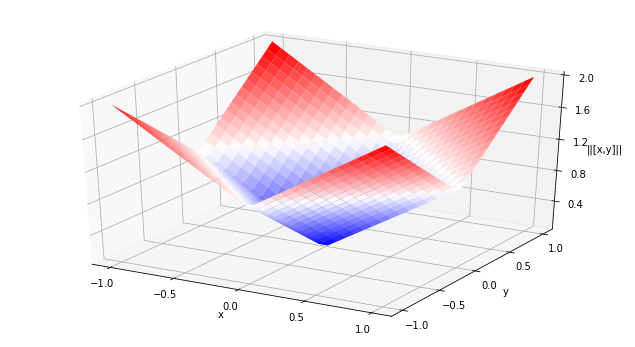

In [21]:
l1_simplified = lambda x, y: abs(x) + abs(y)
plot_norm(l1_simplified)

Alternativ kann man auch $p=2$ in die p-Normen einsetzen. Dadurch erhält man die $L_2$-Norm, die auch als die euklidische Norm bekannt ist. Es ist die Norm, die üblicherweise genutzt wird, um die Länge eines Vektors bzw. den kürzesten Abstand zwischen zwei Punkten zu berechnen:

$$||\vec{v}||_{2}=\sqrt{\sum_{i=1}^{m}{{v}^{(i)}}^2}$$

In [22]:
def l2(vector):
        return np.sqrt(np.sum(vector**2))

print("L2-Norm des Trainingsfehlervektors: ", round(l2(epsilon_train), 2))
print("L2-Norm des Testfehlervektors: ", round(l2(epsilon_test), 2))

L2-Norm des Trainingsfehlervektors:  108.41
L2-Norm des Testfehlervektors:  65.09


NumPy bietet eine Funktion für die euklidische Norm:

In [23]:
print("L2-Norm des Trainingsfehlervektors: ", round(np.linalg.norm(epsilon_train), 2))
print("L2-Norm des Testfehlervektors: ", round(np.linalg.norm(epsilon_test), 2))

L2-Norm des Trainingsfehlervektors:  108.41
L2-Norm des Testfehlervektors:  65.09


Auch die $L_2$-Norm können wir visualisieren. Genau wie die $L_1$-Norm hat die $L_2$-Norm nur ein globales Minimum, da sie eben auch eine konvexe Funktion ist. Anders aber als die $L_1$-Norm ist die $L_2$-Norm überall differenzierbar.

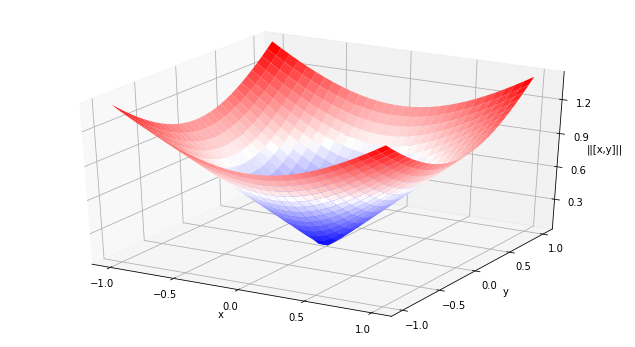

In [24]:
l2_simplified = lambda x, y: np.sqrt(x**2 + y**2)
plot_norm(l2_simplified)

### Die $L_{\infty}$- und $L_{0}$-Normen

Betrachten wir nun zwei Grenzfälle für die p-Normen.

Die $L_{\infty}$-Norm hat folgende Form:

$$||\vec{v}||_{\infty}=\lim_{p\rightarrow\infty}{\left(\sum_{i=1}^{m}\left|{v}^{(i)}\right|^p\right)^\frac{1}{p}}$$

Dieser Grenzwert sieht zunächst einschüchternd aus, kann aber recht schnell gelöst werden. Zuerst macht man sich klar, dass der Beitrag des potenzierten größten Absolutbetrags im Vektor, im Folgenden als $\left|{v}^{(j)}\right|^p$ bezeichnet, bei der Aufsummierung alle Beiträge der potenzierten kleineren Absolutbeträge überwältigt:

$$\lim_{p\rightarrow\infty}{\left|{v}^{(j)}\right|^p}\gg\lim_{p\rightarrow\infty}\left|{v}^{(i)}\right|^\hspace{0.4cm}\forall\ i\neq\ j$$

Die Summe der potenzierten Absolutbeträge kann man also als den potenzierten größten Absolutbetrags betrachten, da der Beitrag der potenzierten kleineren Absolutbeträge im Grenzfall $p\rightarrow\infty$ zu vernachlässigen ist:

$$\lim_{p\rightarrow\infty}\sum_{i=1}^{m}{\left|{v}^{(i)}\right|^p=\lim_{p\rightarrow\infty}{\left|{v}^{(j)}\right|^p}}$$

Die $L_{\infty}$-Norm vereinfacht sich also auf folgende Form:

$$||\vec{v}||_{\infty}={\lim_{p\rightarrow\infty}\left(\left|{v}^{(j)}\right|^p\right)}^\frac{1}{p}=\left|{v}^{(j)}\right|$$

Somit ist gezeigt, dass die $L_{\infty}$-Norm den größten Absolutwert eines Vektors zurückgibt:

$$||\vec{v}||_{\infty}=\underset{i}{max}\hspace{0.1cm}\left|v^{(i)}\right|$$

In [25]:
def l_infinity(vector):
    return np.amax(vector)

print("Größter Absolutwert im Trainingsfehlervektor: ", round(l_infinity(epsilon_train), 2))
print("Größter Absolutwert Abweichung im Testfehlervektor: ", round(l_infinity(epsilon_test), 2))

Größter Absolutwert im Trainingsfehlervektor:  18.61
Größter Absolutwert Abweichung im Testfehlervektor:  20.82


Setzt man in die p-Normen $p=0$ ein, wird es problematisch, da man im Exponenten der Summe durch $0$ teilen würde. Daher gibt es speziell für den Fall $p=0$ eine eigene Definition der $L_0$-Norm. Die $L_0$-Norm gibt zurück, wie viele Nichtnullelemente in einem Vektor vorliegen:

$$||\vec{v}||_{0}:=\sum_{i=1}^{m}1_{v^{(i)}\neq0}$$

Streng genommen ist die $L_0$-Norm auch keine Norm, da sie das Axiom der absoluten Homogenität nicht erfüllt:

$$\forall\vec{v}\in\mathbb{R}^n,\lambda\in\mathbb{R}\setminus\left\{0,1\right\}:||\lambda·\vec{v}||\neq\left|\lambda\right|·||\vec{v}||$$

In [26]:
def l0(vector):
    return np.count_nonzero(vector)

print("Anzahl der Nichtnulleinträge im Trainingsfehlervektor: ", l0(epsilon_train))
print("Anzahl der Nichtnulleinträge im Testfehlervektor: ", l0(epsilon_test))

Anzahl der Nichtnulleinträge im Trainingsfehlervektor:  392
Anzahl der Nichtnulleinträge im Testfehlervektor:  98


### Beweis, dass die p-Normen die Axiome der Vektornormen erfüllen

#### Definitheit und absolute Homogenität

Die p-Normen erfüllen das Axiom der Definitheit, da die $p$-te Wurzel einer Zahl nur $0$ sein kann, wenn die Zahl selbst schon $0$ ist. Die Summe der potenzierten Absolutbeträge im Vektor muss also gleich $0$ sein. Dies geht wiederum nur, wenn es keinen Absolutbetrag ungleich $0$ im Vektor gibt. Wenn also eine p-Norm den Wert $0$ zurückgibt, muss zwangsläufig der Nullvektor vorliegen:

$$ \forall\vec{v}\in\mathbb{R}^n:||\vec{v}||_{p}=0\Leftrightarrow\left(\sum_{i=1}^{m}\left|v^{(i)}\right|^p\right)^\frac{1}{p}=0\Rightarrow\sum_{i=1}^{m}\left|v^{(i)}\right|^p=0\Rightarrow\vec{v}=\left[\begin{matrix}0\\\vdots\\0\\\end{matrix}\right]=0 $$

Auch die absolute Homogenität ist gegeben, da sich ein Proportionalitätsfaktor $\lambda$ leicht aus einer p-Norm ausklammern lässt. Bei einer proportionalen Änderung aller Vektoreinträge um den Proportionalitätsfaktor $\lambda$ ändert sich also auch der Funktionswert der Norm um den Faktor $\lambda$:

$$ \forall\vec{v}\in\mathbb{R}^n,\lambda\in\mathbb{R}:||\lambda\vec{v}||_{p}=\left(\sum_{i=1}^{m}\left|{\lambda v}^{(i)}\right|^p\right)^\frac{1}{p}=\left(\sum_{i=1}^{m}{\left|\lambda\right|^p\left|v^{(i)}\right|^p}\right)^\frac{1}{p}=\left|\lambda\right|\left(\sum_{i=1}^{m}\left|v^{(i)}\right|^p\right)^\frac{1}{p}=\left|\lambda\right|·||\vec{v}||_{p}$$

#### Dreiecksungleichung

Der Beweis, dass die p-Normen die Dreiecksungleichung erfüllt, ist wesentlich umfangreicher als für die vorherigen beiden Axiome und sprengt an dieser Stelle den Rahmen dessen, was ich allgemein zum Thema lineare Regression vorstellen möchte. Denjenigen, die sich aber dennoch für den Beweis interessieren, kann ich Dr. Tisdells Videos zu Minkowskis Ungleichung und zu Hölders Ungleichung empfehlen:

(Minkowskis Ungleichung):
https://www.youtube.com/watch?v=ATCGNBdFTEc

(Hölders Ungleichung):
https://www.youtube.com/watch?v=kxQiKaIuyOg&t=904s

## Kostenfunktionen

### Beweis, dass nichtnegative gewichtete Summen von Normen konvex sind

Seien $f_{1},...,f_{n}$ konvexe Funktionen,$\hspace{0.1cm}\vec{v},\vec{u}\in\mathbb{R}^n$,$\hspace{0.1cm}\lambda\in[0,1]$ und $\omega_{1},...,\omega_{n}\geq0$, dann ist $f(x)=\omega_{1}f_{1}(x)+...+\omega_{n}f_{n}(x)$ ebenfalls konvex.

$$f(\lambda\vec{u}+(1-\lambda)\vec{v})=\omega_1f_1(\lambda\vec{u}+(1-\lambda)\vec{v})+...+\omega_nf_n(\lambda\vec{u}+(1-\lambda)\vec{v})\le$$$$\omega_1({\lambda f}_1(\vec{u})+(1-\lambda)f_1(\vec{v}))+...+\omega_n({\lambda f}_n(\vec{u})+(1-\lambda)f_n(\vec{v}))$$$$=\lambda(\omega_1f_1(\vec{u})+...+\omega_nf_n(\vec{u})))+(1-\lambda)(\omega_1f_1(\vec{v})+...+\omega_nf_n(\vec{v}))$$$$=\lambda\ f(\vec{u})+(1-\lambda)f(\vec{v})$$

Wobei die zweite Zeile aus der Konvexität von $f_{1},...,f_{n}$ und der Tatsache hervorgeht, dass die Ungleichung durch die Nichtnegativität von $\omega_{1},...,\omega_{n}$ erhalten bleibt.

### Mean Absolute Error (MAE) und Root Mean Squared Error (RMSE)

Jetzt, da gezeigt ist, dass nichtnegative Summen von konvexen Funktionen auch konvex sind, können wir mit Gewissheit Kostenfunktionen formulieren, von denen wir wissen, dass sie ebenfalls konvex sind, d.h. nur ein globales Minimum haben. Die erste Kostenfunktion, die wir formulieren, ist die durchschnittliche Absolutabweichung unserer Schätzungen von den tatsächlich gemessenen Werten der Zielgröße. Hierbei handelt es sich um die $L_1$-Norm des Fehlervektors geteilt durch die Länge des Fehlervektors:

$$MAE=\frac{1}{m}\sum_{i=1}^{m}\left|{\hat{y}}^{(i)}-y^{(i)}\right|=\frac{1}{m}||\vec{\varepsilon}||_{1}$$

In [27]:
def MAE(vector):
    return l1(vector)/len(vector)

print("MAE des Trainingsfehlervektors: ", round(MAE(epsilon_train), 2))
print("MAE des Testfehlervektors: ", round(MAE(epsilon_test), 2))

MAE des Trainingsfehlervektors:  3.92
MAE des Testfehlervektors:  4.84


Eine weitere gängige Kostenfunktion ist die Wurzel der durchschnittlichen quadrierten Abweichungen. Hierbei handelt es sich um die $L_2$-Norm des Fehlervektors geteilt durch die Wurzel der Länge des Fehlervektors.

$$RMSE\ =\ \sqrt{\frac{1}{m}\sum_{i=1}^{m}{({\hat{y}}^{(i)}-y^{(i)})}^2}=\frac{1}{\sqrt m}||\vec{\varepsilon}||_{2}$$

In [28]:
def RMSE(vector):
    return l2(vector)/np.sqrt(len(vector))

print("RMSE des Trainingsfehlervektors: ", round(RMSE(epsilon_train), 2))
print("RMSE des Testfehlervektors: ", round(RMSE(epsilon_test), 2))

RMSE des Trainingsfehlervektors:  5.48
RMSE des Testfehlervektors:  6.57


Bei der Auswahl der Kostenfunktion sollte beachtet werden, dass der RMSE die Abweichungen von den tatsächlich beobachteten Werten der Zielgröße quadriert, bevor diese aufsummiert werden. Dadurch fallen große Abweichungen stärker ins Gewicht als beim MAE.

### Mean Squared Error (MSE)

#### Wahrscheinlichkeitstheoretische Herleitung der MSE-Funktion

Meist wird beim Optimieren eines Regressionsmodells jedoch der MSE herangezogen. Er ähnelt der $L_2$-Vektornorm, aber die Wurzel wird wegquadriert und es wird durch die Anzahl der Vektorelemente geteilt:

$$MSE=\frac{1}{m}\sum_{i=1}^{m}{({\hat{y}}^{\left(i\right)}-y^{\left(i\right)})}^2=\frac{1}{m}||\vec{\varepsilon}||^2_2$$

Es gibt mehrere Gründe, wieso der MSE zum Optimieren von Regressionsmodellen verwendet wird. Zunächst einmal betrachten wir eine wahrscheinlichkeitstheoretische Herleitung der MSE-Funktion. Hierbei leiten wir uns aber eine leicht veränderte Version des MSE her:

$$J(\theta)=\frac{1}{2}\sum_{i=1}^{m}{({\hat{y}}^{\left(i\right)}-y^{\left(i\right)})}^2=\frac{1}{2}||\vec{\varepsilon}||^2_2$$

Wie bereits in einem vorherigen Abschnitt geschildert, ist jede Schätzung, die wir mit unserem linearen Modell machen, mit einem Fehler verbunden:

$$y^{(i)}=h({\vec{x}}^{(i)};\vec{\theta})+\varepsilon^{(i)}$$

Für die folgende Herleitung nehmen wir an, dass $\varepsilon^{(i)}$ dabei unabhängig und identisch normalverteilt ist mit $\mu=0$ und einer Varianz $\sigma^2$:

$$\varepsilon^{\left(i\right)}\sim N\left(0,\sigma^2\right)$$

Die Wahrscheinlichkeitsdichtefunktion der Schätzungsfehler hat demnach folgende Form:

$$wdf(\varepsilon^{\left(i\right)})=\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{{{\varepsilon}^{\left(i\right)}}^2}{2\sigma^2}\right)$$

Wir können den $i$-ten Schätzfehler auch als Differenz zwischen dem $i$-ten tatsächlichen Wert der Zielgröße und $h({\vec{x}}^{(i)};\vec{\theta})$ auffassen:

$$\varepsilon^{(i)}=y^{(i)}-h({\vec{x}}^{(i)};\vec{\theta})$$

Aus dieser Formulierung geht hervor, dass $y^{(i)}|\hspace{0.1cm}{\vec{x}}^{(i)};\vec{\theta}$ ebenfalls normalverteilt ist mit $\mu=h({\vec{x}}^{(i)};\vec{\theta})$ und einer Varianz $\sigma^2$.

$$y^{(i)}|\hspace{0.1cm}{\vec{x}}^{(i)};\vec{\theta}\sim N\left(h({\vec{x}}^{(i)};\vec{\theta}),\sigma^2\right)$$

Demgemäß hat die Wahrscheinlichkeitsdichtefunktion von $y^{(i)}|\hspace{0.1cm}{\vec{x}}^{(i)};\vec{\theta}$ folgende Form:

$$wdf(y^{(i)}|\hspace{0.1cm}{\vec{x}}^{(i)};\vec{\theta})=\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{{(y^{(i)}-h({\vec{x}}^{(i)};\vec{\theta}))}^2}{2\sigma^2}\right)$$

Wir formulieren nun die Likelihood-Funktion $L(\vec{\theta})$ als die Wahrscheinlichkeitsdichtefunktion von $\vec{y}\hspace{0.1cm}|\hspace{0.1cm}X;\vec{\theta}$, was durch die Annahme der Unabhängigkeit der Schätzungsfehler folgendes Produkt ist:

$$L(\vec{\theta})=\prod_{i=1}^{m}{wdf(y^{(i)}|\hspace{0.1cm}{\vec{x}}^{(i)};\vec{\theta})=\prod_{i=1}^{m}{\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{{(y^{(i)}-h({\vec{x}}^{(i)};\vec{\theta}))}^2}{2\sigma^2}\right)}}$$

Im Sinne der Maximum-Likelihood-Estimation wollen wir nun einen Parametervektor $\vec{\theta}$ finden, der die Likelihood $L(\vec{\theta})$ maximiert:

$$\underset{\vec{\theta}}{max}\hspace{0.1cm}{L(\vec{\theta})}$$

Statt ${L(\vec{\theta})}$ können wir aber auch alternativ eine monoton steigende Funktion von ${L(\vec{\theta})}$ maximieren. Damit wir uns die Mathematik etwas erleichtern können, maximieren wir also die log-Likelihood-Funktion ${l(\vec{\theta})}$:

$$l(\vec{\theta})=\log{L(\vec{\theta})}=\log\prod_{i=1}^{m}{\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{{(y^{(i)}-h({\vec{x}}^{(i)};\vec{\theta}))}^2}{2\sigma^2}\right)}$$

Der Logarithmus eines Produkts entspricht der Summe der Logarithmen der Faktoren:

$$l(\vec{\theta})=\sum_{i=1}^{m}\log\left[\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{{(y^{(i)}-h({\vec{x}}^{(i)};\vec{\theta}))}^2}{2\sigma^2}\right)\right]$$

Wir können $l(\vec{\theta})$ noch ein wenig umformen und wir sehen, dass die MSE-Funktion im rechten Teil der log-Likelihood auftaucht:

$$l(\vec{\theta})=m· \log\frac{1}{\sqrt{2\pi}\sigma}+\sum_{i=1}^{m}{-\frac{{(y^{(i)}-h({\vec{x}}^{(i)};\vec{\theta}))}^2}{2\sigma^2}}$$$$=m· \log\frac{1}{\sqrt{2\pi}\sigma}-\frac{1}{\sigma^2}·\frac{1}{2}\sum_{i=1}^{m}{(y^{(i)}-h({\vec{x}}^{(i)};\vec{\theta}))}^2$$

Das Minimieren der MSE-Funktion entspricht also dem Maximieren der log-Likelihood.

#### Konvexität der MSE-Funktion

Die MSE-Funktion geht zwar nicht unmittelbar aus den p-Normen hervor, aber sie ist dennoch konvex und eignet sich daher als Kostenfunktion für Optimierungsprobleme. Um die Konvexität der MSE-Funktion zu beweisen, formulieren wir sie zunächst mal in einer vektorisierten Form:

$$J(\vec{\theta})=\frac{1}{2}||\vec{\varepsilon}||_{2}^{2} = \frac{1}{2}\vec{\varepsilon}^T\vec{\varepsilon}=\frac{1}{2}(X\vec{\theta}-\vec{y})^T(X\vec{\theta}-\vec{y})\in\mathbb{R}$$

Danach bestimmen wir den Gradienten der MSE-Funktion:

$$\nabla J(\vec{\theta})=\left[\begin{matrix}\frac{\partial J\left(\vec{\theta}\right)}{\partial\theta_0}\\\frac{\partial J\left(\vec{\theta}\right)}{\partial\theta_1}\\\vdots\\\frac{\partial J\left(\vec{\theta}\right)}{\partial\theta_n}\\\end{matrix}\right]=\left[\begin{matrix}\begin{matrix}\sum_{i=1}^{m}\left(\sum_{j=0}^{n}\theta_jx_j^{(i)}-y^{(i)}\right)x_0^{(i)}\\\sum_{i=1}^{m}\left(\sum_{j=0}^{n}\theta_jx_j^{(i)}-y^{(i)}\right)x_1^{(i)}\\\end{matrix}\\\vdots\\\sum_{i=1}^{m}\left(\sum_{j=0}^{n}\theta_jx_j^{(i)}-y^{(i)}\right)x_n^{(i)}\\\end{matrix}\right]=\left[\begin{matrix}\begin{matrix}\sum_{i=1}^{m}{{\hat{\varepsilon}}^{(i)}x}_0^{(i)}\\\sum_{i=1}^{m}{{\hat{\varepsilon}}^{(i)}x}_1^{(i)}\\\end{matrix}\\\vdots\\\sum_{i=1}^{m}{{\hat{\varepsilon}}^{(i)}x}_n^{(i)}\\\end{matrix}\right]=X^T(X\vec{\theta}-\vec{y})\in\mathbb{R}^{n+1}$$

Davon ausgehend stellen wir die Hesse-Matrix der MSE-Funktion auf:

$$\nabla^2J(\vec{\theta})=\left[\begin{matrix}\begin{matrix}\begin{matrix}\frac{\partial J(\vec{\theta})}{\partial{\theta_0}^2}&\frac{\partial J(\vec{\theta})}{\partial\theta_0\theta_1}\\\end{matrix}&...&\frac{\partial J(\vec{\theta})}{\partial\theta_0\theta_n}\\\end{matrix}\\\begin{matrix}\begin{matrix}\frac{\partial J(\vec{\theta})}{\partial\theta_1\theta_0}&\frac{\partial J(\vec{\theta})}{\partial{\theta_1}^2}\\\end{matrix}&...&\frac{\partial J(\vec{\theta})}{\partial\theta_1\theta_n}\\\end{matrix}\\\vdots\\\begin{matrix}\begin{matrix}\frac{\partial J(\vec{\theta})}{\partial\theta_n\theta_0}&\frac{\partial J(\vec{\theta})}{\partial\theta_n\theta_1}\\\end{matrix}&...&\frac{\partial J(\vec{\theta})}{\partial{\theta_n}^2}\\\end{matrix}\\\end{matrix}\right]=\left[\begin{matrix}\begin{matrix}\begin{matrix}\sum_{i=1}^{m}{x_0^{(i)}}^2&\sum_{i=1}^{m}{x_0^{(i)}x_1^{(i)}}\\\end{matrix}&...&\sum_{i=1}^{m}{x_0^{(i)}x_n^{(i)}}\\\end{matrix}\\\begin{matrix}\begin{matrix}\sum_{i=1}^{m}{x_1^{(i)}x_0^{(i)}}&\sum_{i=1}^{m}{x_1^{(i)}}^2\\\end{matrix}&...&\sum_{i=1}^{m}{x_1^{(i)}x_n^{(i)}}\\\end{matrix}\\\vdots\\\begin{matrix}\begin{matrix}\sum_{i=1}^{m}{x_n^{(i)}x_0^{(i)}}&\sum_{i=1}^{m}{x_n^{(i)}x_1^{(i)}}\\\end{matrix}&...&\sum_{i=1}^{m}{x_n^{(i)}}^2\\\end{matrix}\\\end{matrix}\right]=X^TX\in\mathbb{R}^{n+1\ \times\ n+1}$$

Wir wollen zeigen, dass die Hesse-Matrix $X^TX\succcurlyeq0$, also positiv semidefinit ist. Dadurch bestätigen wir die Konvexität der MSE-Funktion.

Eine $(k \times k)$-Matrix $A$ heißt positiv semidefinit $:\Leftrightarrow\forall\vec{v}\in\mathbb{R}^k,\vec{v}\neq0:\ {\vec{v}}^TA\vec{v}\geq0$

Wir zeigen also, dass $\forall\vec{v}\in\mathbb{R}^{n+1},\vec{v}\neq0:{\vec{v}}^TX^TX\vec{v}\geq0$

$${\vec{v}}^TX^TX\vec{v}=\left(X\vec{v}\right)^T\left(X\vec{v}\right)=||X\vec{v}||_{2}^{2}\geq0$$

Somit ist die Konvexität der MSE-Funktion gezeigt.

## Die Normal Equation als analytischer Ansatz zur Parameterbestimmung

In einem vorherigen Abschnitt haben wir mithilfe des LinearRegression-Objekts der Scikit-Learn-Bibliothek das optimale Parameterpaar $(\theta_{0},\theta_{1})$ für unsere einfache lineare Regression bestimmt. Im Folgenden lernen wir aber die Normal Equation kennen, mit der wir selbst die optimalen Parameter bestimmen können. Die Herleitung der Normal Equation ist umfangreich, aber es lohnt sich. Denn am Ende werden wir nur eine einzelne Zeile Code brauchen, um lineare Regressionprobleme analytisch lösen zu können.

Wir beginnen mit unserer MSE-Kostenfunktion ohne den $\frac{1}{2}$-Term, also quasi nur den Squared Error (SE), und bringen diesen in folgende Form:

$$J(\vec{\theta})={(X\vec{\theta}-\vec{y})}^T(X\vec{\theta}-\vec{y})$$$$=({(X\vec{\theta})}^T-{\vec{y}}^T)(X\vec{\theta}-\vec{y})$$$$={(X\vec{\theta})}^T(X\vec{\theta})-{(X\vec{\theta})}^T(\vec{y})-{(\vec{y})}^T(X\vec{\theta})-{(\vec{y})}^T(\vec{y})$$$$={\vec{\theta}}^TX^TX\vec{\theta}-{2(X\vec{\theta})}^T\vec{y}-{\vec{y}}^T\vec{y}$$

Unser Ziel ist es, das Minimum der Kostenfunktion zu finden. Da die MSE-Funktion konvex ist, ist jeder Punkt mit einer Steigung von $0$ ein globales Minimum. Wir werden also den Gradienten der MSE-Funktion bestimmen und gleich $0$ setzen, damit wir abschließend nach dem optimalen Parametervektor $\vec{\theta}$ auflösen können. Nur ist die Bestimmung des Gradienten in der aktuellen Form der MSE-Funktion mühselig. Zur Vereinfachung werden wir $J(\vec{\theta})$ als Funktion zwei kleinerer Funktionen $P(\vec{\theta}),Q(\vec{\theta})$ auffassen:

$$J(\vec{\theta})= P(\vec{\theta})-Q(\vec{\theta})-\vec{y}^T\vec{y}$$
$$P(\vec{\theta})={\vec{\theta}}^TX^TX\vec{\theta}$$
$$Q(\vec{\theta})={2(X\vec{\theta})}^T\vec{y}$$

Der Gradient der MSE-Funktion setzt sich demnach folgendermaßen zusammen:

$$\nabla J(\vec{\theta})=\nabla P(\vec{\theta})-\nabla Q(\vec{\theta})-\nabla (\vec{y}^T\vec{y})$$
$$\nabla J(\vec{\theta})=\nabla P(\vec{\theta})-\nabla Q(\vec{\theta})$$

Wir werden jetzt also im Folgenden $\nabla P(\vec{\theta}),\nabla Q(\vec{\theta})$ ermitteln. Beginnen wir mit $\nabla P(\vec{\theta})$. Hierfür machen wir uns zunächst klar, wie $P(\vec{\theta})$ ausgeschrieben ausschaut:

$$P(\vec{\theta})=\left[\begin{matrix}\theta_0&\theta_1&\begin{matrix}...&\theta_n\\\end{matrix}\\\end{matrix}\right]\left[\begin{matrix}\begin{matrix}\begin{matrix}x_0^{(1)}&x_0^{(2)}\\\end{matrix}&...&x_0^{(m)}\\\end{matrix}\\\begin{matrix}\begin{matrix}x_1^{(1)}&x_1^{(2)}\\\end{matrix}&...&x_1^{(m)}\\\end{matrix}\\\vdots\\\begin{matrix}\begin{matrix}x_n^{(1)}&x_n^{(2)}\\\end{matrix}&...&x_n^{(m)}\\\end{matrix}\\\end{matrix}\right]\left[\begin{matrix}\begin{matrix}\begin{matrix}x_0^{(1)}&x_1^{(1)}\\\end{matrix}&...&x_n^{(1)}\\\end{matrix}\\\begin{matrix}\begin{matrix}x_0^{(2)}&x_1^{(2)}\\\end{matrix}&...&x_n^{(2)}\\\end{matrix}\\\vdots\\\begin{matrix}\begin{matrix}x_0^{(m)}&x_1^{(m)}\\\end{matrix}&...&x_n^{(m)}\\\end{matrix}\\\end{matrix}\right]\left[\begin{matrix}\theta_0\\\theta_1\\\vdots\\\theta_n\\\end{matrix}\right]$$

Wir vereinfachen die Matrixmultiplikation $X^T X$, nennen das Ergebnis $X^2$ und sehen, dass $X^2$ eine symmetrische Matrix ist:

$$X^TX=X^2=\left[\begin{matrix}\begin{matrix}\begin{matrix}\sum_{i=1}^{m}{x_0^{(i)}}^2&\sum_{i=1}^{m}{x_0^{(i)}x_1^{(i)}}\\\end{matrix}&...&\sum_{i=1}^{m}{x_0^{(i)}x_n^{(i)}}\\\end{matrix}\\\begin{matrix}\begin{matrix}\sum_{i=1}^{m}{x_1^{(i)}x_0^{(i)}}&\sum_{i=1}^{m}{x_1^{(i)}}^2\\\end{matrix}&...&\sum_{i=1}^{m}{x_1^{(i)}x_n^{(i)}}\\\end{matrix}\\\vdots\\\begin{matrix}\begin{matrix}\sum_{i=1}^{m}{x_n^{(i)}x_0^{(i)}}&\sum_{i=1}^{m}{x_n^{(i)}x_1^{(i)}}\\\end{matrix}&...&\sum_{i=1}^{m}{x_n^{(i)}}^2\\\end{matrix}\\\end{matrix}\right]=\left[\begin{matrix}\begin{matrix}\begin{matrix}X_{0,0}^2&X_{0,1}^2\\\end{matrix}&...&X_{0,n}^2\\\end{matrix}\\\begin{matrix}\begin{matrix}X_{1,0}^2&X_{1,1}^2\\\end{matrix}&...&X_{1,n}^2\\\end{matrix}\\\vdots\\\begin{matrix}\begin{matrix}X_{n,0}^2&X_{n,1}^2\\\end{matrix}&...&X_{n,n}^2\\\end{matrix}\\\end{matrix}\right]$$

Wir setzen $X^2$ in unsere vorherige ausgeschriebene Form von $P(\vec{\theta})$ ein und bringen das Ergebnis in eine lineare Form:

$$P(\vec{\theta})={\vec{\theta}}^TX^2\vec{\theta}=\left[\begin{matrix}\theta_0&\theta_1&\begin{matrix}...&\theta_n\\\end{matrix}\\\end{matrix}\right]\left[\begin{matrix}\begin{matrix}\begin{matrix}X_{0,0}^2&X_{0,1}^2\\\end{matrix}&...&X_{0,n}^2\\\end{matrix}\\\begin{matrix}\begin{matrix}X_{1,0}^2&X_{1,1}^2\\\end{matrix}&...&X_{1,n}^2\\\end{matrix}\\\vdots\\\begin{matrix}\begin{matrix}X_{n,0}^2&X_{n,1}^2\\\end{matrix}&...&X_{n,n}^2\\\end{matrix}\\\end{matrix}\right]\left[\begin{matrix}\theta_0\\\theta_1\\\vdots\\\theta_n\\\end{matrix}\right]$$

$$P\left(\vec{\theta}\right)=\theta_0\left(X_{0,0}^2\theta_0+X_{0,1}^2\theta_1+\ldots+X_{0,n}^2\theta_n\right)+\theta_1\left(X_{1,0}^2\theta_0+X_{1,1}^2\theta_1+\ldots+X_{1,n}^2\theta_n\right)+\ldots+\theta_n\left(X_{n,0}^2\theta_0+X_{n,1}^2\theta_1+\ldots+X_{n,n}^2\theta_n\right)=\left(X_{0,0}^2{\theta_0}^2+X_{0,1}^2\theta_1\theta_0+\ldots+X_{0,n}^2\theta_n\theta_0\right)+\left(X_{1,0}^2\theta_0\theta_1+X_{1,1}^2{\theta_1}^2+\ldots+X_{1,n}^2\theta_n\theta_1\right)+\ldots+\left(X_{n,0}^2\theta_0\theta_n+X_{n,1}^2\theta_1\theta_n+\ldots+X_{n,n}^2{\theta_n}^2\right)$$

Zur Bestimmung des Gradienten von $P(\vec{\theta})$ finden wir zunächst einmal exemplarisch die partielle Ableitung von $P(\vec{\theta})$ nach $\theta_0$:

$$\frac{\partial P(\vec{\theta})}{\partial\theta_0}=(2\theta_0X_{0,0}^2+X_{0,1}^2\theta_1+...+X_{0,n}^2\theta_n)+\ X_{1,0}^2\theta_1+...X_{n,0}^2\theta_n$$

Dadurch, dass $X^2$ symmetrisch ist, gilt:

$$X_{i,j}^2=X_{j,i}^2$$

Daraus folgt:

$$\frac{\partial P(\vec{\theta})}{\partial\theta_0}=2\theta_0X_{0,0}^2+2\theta_1X_{0,1}^2+...+2{\theta_nX}_{0,n}^2$$

Die restlichen partiellen Ableitungen lassen sich analog dazu bestimmen, weshalb $\nabla P(\vec{\theta})$ folgende Form hat:

$$\nabla P(\vec{\theta})=\left[\begin{matrix}\frac{\partial P(\vec{\theta})}{\partial\theta_0}\\\frac{\partial P(\vec{\theta})}{\partial\theta_1}\\\vdots\\\frac{\partial P(\vec{\theta})}{\partial\theta_n}\\\end{matrix}\right]=\left[\begin{matrix}2\theta_0X_{0,0}^2+2X_{0,1}^2\theta_1+...+2X_{0,n}^2\theta_n\\2\theta_0X_{1,0}^2+2X_{1,1}^2\theta_1+...+2X_{1,n}^2\theta_n\\\vdots\\2\theta_0X_{n,0}^2+2X_{n,1}^2\theta_1+...+2X_{n,n}^2\theta_n\\\end{matrix}\right]=2\left[\begin{matrix}\theta_0X_{0,0}^2+X_{0,1}^2\theta_1+...+X_{0,n}^2\theta_n\\\theta_0X_{1,0}^2+X_{1,1}^2\theta_1+...+X_{1,n}^2\theta_n\\\vdots\\\theta_0X_{n,0}^2+X_{n,1}^2\theta_1+...+X_{n,n}^2\theta_n\\\end{matrix}\right]=2X^2\vec{\theta}$$

Wir ersetzten $X^2$ wieder mit $X^T X$:

$${2X}^2\vec{\theta}=2X^TX\vec{\theta}$$

$$\nabla P(\vec{\theta})=2X^TX\vec{\theta}$$

Das war der schwerste Teil der Herleitung der Normal Equation. Ab jetzt wird es einfacher. Wir bestimmen nun $\nabla Q(\vec{\theta})$. Hierfür bringen wir $Q(\vec{\theta})$ in eine lineare Form:

$$Q(\vec{\theta})={2(X\vec{\theta})}^T\vec{y}=2\sum_{i=1}^{m}{y^{(i)}(x_0^{(i)}\theta_0+...+x_n^{(i)}\theta_n)=}2\sum_{i=1}^{m}\sum_{j=0}^{n}{x_j^{(i)}\theta_jy^{(i)}}$$

An dieser Stelle können wir direkt schon ohne weitere Umformungen die partiellen Ableitungen von $Q(\vec{\theta})$ bestimmen:

$$\frac{\partial Q(\vec{\theta})}{\partial\theta_0}=2(x_0^{(1)}y^{(1)}+...+x_0^{(m)}y^{(m)})=2\sum_{i=1}^{m}y^{(i)}$$$$\frac{\partial Q(\vec{\theta})}{\partial\theta_1}=2(x_1^{(1)}y^{(1)}+...+x_1^{(m)}y^{(m)})$$$$...$$$$\frac{\partial Q(\vec{\theta})}{\partial\theta_n}=2(x_n^{(1)}y^{(1)}+...+x_n^{(m)}y^{(m)})$$

Der Gradient $\nabla Q(\vec{\theta})$ hat daher die folgende Form:

$$\nabla Q(\vec{\theta})=\left[\begin{matrix}\frac{\partial Q(\vec{\theta})}{\partial\theta_0}\\\frac{\partial Q(\vec{\theta})}{\partial\theta_1}\\\vdots\\\frac{\partial Q(\vec{\theta})}{\partial\theta_n}\\\end{matrix}\right]=\left[\begin{matrix}2(x_0^{(1)}y^{(1)}+...+x_0^{(m)}y^{(m)})\\2(x_1^{(1)}y^{(1)}+...+x_1^{(m)}y^{(m)})\\\vdots\\2(x_n^{(1)}y^{(1)}+...+x_n^{(m)}y^{(m)})\\\end{matrix}\right]=2\left[\begin{matrix}(x_0^{(1)}y^{(1)}+...+x_0^{(m)}y^{(m)})\\(x_1^{(1)}y^{(1)}+...+x_1^{(m)}y^{(m)})\\\vdots\\(x_n^{(1)}y^{(1)}+...+x_n^{(m)}y^{(m)})\\\end{matrix}\right]=2X^T\vec{y}$$

Wir setzen also $\nabla P(\vec{\theta})$ und $\nabla Q(\vec{\theta})$ in die vorherige Gleichung ein und erhalten:

$$\nabla J(\vec{\theta})=\nabla P(\vec{\theta})-\nabla Q(\vec{\theta})=2X^TX\vec{\theta}-2X^T\vec{y}$$

Wir suchen den Parametervektor $\vec{\theta}$, der die MSE-Funktion minimiert. Wir setzen also den Gradienten $\nabla J(\vec{\theta}) = 0$ und lösen nach $\vec{\theta}$ auf:

$$2X^TX\vec{\theta}-2X^T\vec{y}=0$$
$$⇔X^TX\vec{\theta}=X^T\vec{y}$$
$$⇔\vec{\theta}={(X^TX)}^{-1}X^T\vec{y}$$

Sofern $X^T X$ invertierbar ist, können wir also die optimalen Parameter für ein lineares Regressionsproblem über einen Aufruf der untenstehenden Funktion bestimmen. Das Invertieren einer $(n \times n)$-Matrix hat je nach Implementierung eine Laufzeitkomplexität von $O(n^{2.4})$ bis $O(n^3)$. Die Normal Equation ist also langsam, wenn die Anzahl der Prädiktoren sehr hoch ist (> 100.000). Dafür verhält sich die Normal Equation hinsichtlich der Anzahl der Trainingsbeispiele linear ($O(m)$). 

In [29]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [30]:
X_train = np.c_[np.ones(train.shape[0]), train["RM"]]
y_train = np.array(train["MEDV"]).reshape(train["MEDV"].size, 1)

for i in range(2):
    print("Theta_{}: ".format(i), round(float(normal_equation(X_train, y_train)[i]), 2))

Theta_0:  -30.28
Theta_1:  8.31


## Gradient Descent als iterativer Ansatz zur Parameterbestimmung

### Batch Gradient Descent

Gradient Descent ist im Allgemeinen eine iterative Alternative zur Parameterbestimmung, die sich für Modelle mit sehr vielen Prädiktoren besser eignet als die Normal Equation. Es gibt aber verschiedene Varianten von Gradient Descent, die alle ihre eigenen Vor- und Nachteile haben.

Beim Batch Gradient Descent wird der Parametervektor $\vec{\theta}$ iterativ aktualisiert, indem vom aktuellen Parametervektor der gewichtete Gradient der Kostenfunktion vom aktuellen Parametervektors subtrahiert wird. Das Gewicht $\eta$ bezeichnen wir hierbei als Lernrate:

$${\vec{\theta}}_{\left(t+1\right)}:={\vec{\theta}}_{\left(t\right)}-\eta\nabla J\left({\vec{\theta}}_{\left(t\right)}\right)$$

Bei der verwendeten Kostenfunktion handelt es sich um den MSE:

$$J(\vec{\theta})=\frac{1}{m}(X\vec{\theta}-\vec{y})^T(X\vec{\theta}-\vec{y})$$

Der Gradient hat daher die folgende Form:

$$\nabla J\left(\vec{\theta}\right)=\frac{1}{m}X^T(X\vec{\theta}-\vec{y})\in\mathbb{R}^{n+1}$$

Der Gradient ist die Richtung des steilsten Aufstiegs eines Funktionswertes (Beweis folgt in einem späteren Abschnitt). Sich also in die dem Gradienten entgegengesetzte Richtung zu bewegen führt bei einer ausreichend kleinen Lernrate zu folgender monoton fallenden Folge:

$$J\left({\vec{\theta}}_{\left(0\right)}\right)\geq J\left({\vec{\theta}}_{\left(1\right)}\right)\geq J\left({\vec{\theta}}_{\left(2\right)}\right)\geq\ldots$$

Wenn die $L_2$-Norm des Gradienten der Kostenfunktion zu einem Iterationsschrit $t$ kleiner ist als eine geforderte Präzision $\delta$, gilt Gradient Descent als konvergiert:

$$\left|\left|\nabla J\left({\vec{\theta}}_{\left(t\right)}\right)\right|\right|_{2}\le\delta$$

In [31]:
def batchGradientDescent(X, y, eta = 0.04, max_iters = 20000, delta = 0.001, seed = 0):
    
    np.random.seed(seed)
    theta = np.random.randn(X.shape[1], 1)
    counter = 0
    
    for t in range(max_iters):
        
        gradient = (X.T @ ((X @ theta) - y)) / y.size
        theta -= eta * gradient
        counter +=1
        
        if l2(gradient) < delta:
            print("Gewünschte Genauigkeit wurde erreicht: ")
            break
    
    print("Es wurden {} Iterationen durchlaufen.".format(counter))
    return theta

In [32]:
theta = batchGradientDescent(X_train, y_train)
for i in range(2):
    print("Theta_{}: ".format(i), round(theta[i,0], 2))

Gewünschte Genauigkeit wurde erreicht: 
Es wurden 14519 Iterationen durchlaufen.
Theta_0:  -30.18
Theta_1:  8.3


### Stochastic Gradient Descent

Ein Nachteil an Batch Gradient Descent ist, dass bei jedem Iterationsschritt der ganze Trainingsdatensatz bei der Berechnung des Gradienten berücksichtigt wird. Das kann bei großen Datensätzen zu einem langsamen Lernen der Parameter führen. Bei Stochastic Gradient Descent wird bei jedem Iterationsschritt der Gradient für nur ein Trainingsbeispiel berechnet. Das jeweilige Trainingsbeispiel wird zufällig aus der Menge der Trainingsbeispiele gezogen:

$${\vec{\theta}}_{\left(t+1\right)}:={\vec{\theta}}_{\left(t\right)}-\eta\nabla J^{(i)}\left({\vec{\theta}}_{\left(t\right)}\right),\hspace{0.2cm}i \sim U\left\{{1,\ldots,m}\right\}$$

Der Gradient hat also folgende Form:

$$\nabla J^{(i)}\left(\vec{\theta}\right)=\vec{x}^{(i)}({{\vec{x}}^{(i)T}}\vec{\theta}-y^{(i)})\in\mathbb{R}^{n+1}$$

Es lässt sich zeigen, dass der Erwartungswert des Gradienten bei Stochastic Gradient Descent gleich dem Gradient der MSE-Funktion ist:

$$\mathbb{E}_{i \sim U\left\{{1,\ldots,m}\right\}}[\nabla J^{(i)}\left(\vec{\theta}\right)]= \nabla \mathbb{E}_{i \sim U\left\{{1,\ldots,m}\right\}}[J^{(i)}\left(\vec{\theta}\right)]=\nabla\sum_{k=1}^{m}{\mathbb{P}(i=k)}\hspace{0.1cm}J^{(i)}\left(\vec{\theta}\right)=\nabla\frac{1}{m}\sum_{k=1}^{m}{J^{(i)}\left(\vec{\theta}\right)}=\frac{1}{m}X^T(X\vec{\theta}-\vec{y})$$

In [33]:
def stochasticGradientDescent(X, y, eta = 0.04, max_iters = 20000, delta = 0.001, seed = 0):
    
    np.random.seed(seed)
    theta = np.random.randn(X.shape[1], 1)
    counter = 0
    
    for t in range(max_iters):
        
        index = np.random.randint(0, y.size)
        xi = X[index].reshape(X.shape[1], 1)
        yi = y[index].reshape(1, 1)
        gradient = (xi @ (xi.T @ theta - yi))
        theta -= eta * gradient
        counter += 1
        
        if l2(gradient) < delta:
            print("Gewünschte Genauigkeit wurde erreicht: ")
            break
        
    print("Es wurden {} Iterationen durchlaufen.".format(counter))
    return theta

In [34]:
theta = stochasticGradientDescent(X_train, y_train)
for i in range(2):
    print("Theta_{}: ".format(i), round(theta[i,0], 2))

Es wurden 20000 Iterationen durchlaufen.
Theta_0:  -30.83
Theta_1:  8.95


### Mini-Batch Gradient Descent

Mini-Batch Gradient Descent ist ein Kompromiss aus Batch Gradient Descent und Stochastic Gradient Descent. Es wird vor Beginn eine Größe für die Mini-Batches bestimmt und dann erfolgt Stochastic Gradient Descent mit einem zufälligen Mini-Batch $B$ pro Iterationsschritt:

$${\vec{\theta}}_{\left(t+1\right)}:={\vec{\theta}}_{\left(t\right)}-\eta\nabla J_B\left({\vec{\theta}}_{\left(t\right)}\right)$$

$$\nabla J_B\left(\vec{\theta}\right)=\frac{1}{\left|B\right|}\sum_{i\in B}{\nabla J^{(i)}\left(\vec{\theta}\right)}\in\mathbb{R}^{n+1}$$

In [35]:
def miniBatchGradientDescent(X, y, eta = 0.045, max_iters = 20000, delta = 0.001, batch_size = 32, seed = 0):
    
    np.random.seed(seed)
    theta = np.random.randn(X.shape[1], 1)
    counter = 0
    
    data = np.c_[X, y]
    np.random.shuffle(data)
    
    for t in range(max_iters):
        idx = np.random.randint(y.size, size = batch_size)
        x_ = data[idx, :-1]
        y_ = data[idx, -1].reshape(batch_size, 1)
        gradient = (x_.T @ (x_ @ theta - y_)) / batch_size
        theta -= eta * gradient
        counter += 1
        
        if l2(gradient) < delta:
            print("Gewünschte Genauigkeit wurde erreicht: ")
            break
    
    print("Es wurden {} Iterationen durchlaufen.".format(counter))
    return theta

In [36]:
theta = miniBatchGradientDescent(X_train, y_train)
for i in range(2):
    print("Theta_{}: ".format(i), round(theta[i,0], 2))

Es wurden 20000 Iterationen durchlaufen.
Theta_0:  -30.42
Theta_1:  9.11


### Gegenüberstellung der Algorithmen

Nach Vorstellung der verschiedenen Ansätze zur Parameterbestimmung, stellt sich die Frage, wann denn welcher Algorithmus Anwendung finden sollte. Zusammenfassend lässt sich zu den hier vorgestellten Algorithmen Folgendes sagen:

- *Normal Equation*: 
    - Selbst bei großem $m$ noch schnell
    - Kein Out-of-Core-Learning möglich (werden wir noch zu einem späteren Zeitpunkt kennenlernen)
    - Langsam bei großem $n$
    - Feature Scaling nicht nötig (werden wir noch zu einem späteren Zeitpunkt kennenlernen)
    - Keine Hyperparameter
- *Batch Gradient Descent*:
    - Langsam bei großem $m$
    - Kein Out-of-Core-Learning möglich
    - Selbst bei großem $n$ noch schnell
    - Feature Scaling ratsam
    - Zwei Hyperparameter (eta, max_iters)
- *Stochastic Gradient Descent*:
    - Selbst bei großem $m$ noch schnell
    - Out-of-Core-Learning möglich
    - Selbst bei großem $n$ noch schnell
    - Feature Scaling ratsam
    - Zwei Hyperparameter (eta, max_iters)
- *Mini-Batch Gradient Descent*:
    - Selbst bei großem $m$ noch schnell
    - Out-of-Core-Learning möglich
    - Selbst bei großem $n$ noch schnell
    - Feature Scaling ratsam
    - Drei Hyperparameter (eta, max_iters, batch_size)
    
Die Normal Equation und Batch Gradient Descent finden die optimalen Parameter. Bei Stochastic Gradient Descent und Mini-Batch Gradient Descent wird der optimale Parametervektor näherungsweise gefunden.

### Beweis, dass der Gradient die Richtung des steilsten Aufstiegs darstellt

Seien $\vec{v}\in\mathbb{R}^n$ ein Richtungsvektor mit $||\vec{v}||_{2}=1,\hspace{0.2cm}f:\mathbb{R}^n\rightarrow\mathbb{R}$ eine differenzierbare Funktion und $\vec{a}\in\mathbb{R}^n$ ein Ortsvektor, so ist die Richtungsableitung gegeben durch:

$$\nabla_{\vec{a}}f^{T}\vec{v}=||\nabla_{\vec{a}}f||_{2}·||\vec{v}||_{2}\cos{\theta}=||\nabla_{\vec{a}}f||_{2}\cos{\theta}$$

Wir suchen nun den Winkel $\theta$, der das Skalarprodukt mit dem Einheitsvektor $\vec{v}$ maximiert:

$$\underset{\theta}{max}\hspace{0.2cm}||\nabla_{\vec{a}}f||_{2}\cos{\theta}=0$$

Der Einheitsvektor, der die Richtungsableitung maximiert, hat also folgende Form:

$$\underset{||\vec{v}||_{2}=1}{max}\nabla_{\vec{a}}f^{T}\vec{v}=\frac{\nabla_{\vec{a}}f}{{||\nabla_{\vec{a}}f}||_2}$$

Es handelt sich also hierbei beim funktionswertmaximierenden Einheitsvektor um eine skalierte Version des Gradienten. Die Richtung des steilsten Aufstiegs ist also der Gradient.

### Momentum

Gradient Descent kann manchmal sehr langsam sein. Um die Konvergenz in deutlich weniger Iterationsschritten zu gewährleisten, kann Momentum verwendet werden. Hierbei geben wir Gradient Descent sozusagen ein Kurzzeitgedächtnis. Ein Momentumvektor $\vec{m}$ setzt sich zusammen aus dem vorherigen Momentumvektor multipliziert mit einem Gewicht $\gamma$ und dem aktuellen Gradienten der Kostenfunktion:

$${\vec{m}}_{(t+1)}:=\gamma{\vec{m}}_{(t)}+\nabla J\left({\vec{\theta}}_{\left(t\right)}\right)\in\mathbb{R}^{n+1}$$

Danach erfolgt die übliche Parameteraktualisierung, bloß dass wir um den gewichteten Momentumvektor korrigieren statt dem gewichteten Gradienten:

$${\vec{\theta}}_{\left(t+1\right)}≔{\vec{\theta}}_{\left(t\right)}-\eta \vec{m}_{(t+1)}$$

In [37]:
def batchGradientDescentMomentum(X, y, eta = 0.04, max_iters = 20000, delta = 0.001, gamma = 0.9, seed = 0):
    
    np.random.seed(seed)
    theta = np.random.randn(X.shape[1], 1)
    counter = 0
    m = [0]*(max_iters + 1)
    
    for t in range(max_iters):
        
        gradient = (X.T @ ((X @ theta) - y)) / y.size
        m[t+1] = gamma*m[t] + gradient
        theta -= eta * m[t+1]
        counter +=1
        
        if l2(gradient) < delta:
            print("Gewünschte Genauigkeit wurde erreicht: ")
            break
    
    print("Es wurden {} Iterationen durchlaufen.".format(counter))
    return theta

In [38]:
theta = batchGradientDescentMomentum(X_train, y_train)
for i in range(2):
    print("Theta_{}: ".format(i), round(theta[i,0], 2))

Gewünschte Genauigkeit wurde erreicht: 
Es wurden 1406 Iterationen durchlaufen.
Theta_0:  -30.18
Theta_1:  8.3


## Polynomenregression

### Form der Hypothese

Mit einer linearen Regression lassen sich nicht nur lineare Zusammenhänge modellieren. Eingangs stellten wir fest, dass der Zusammenhang zwischen LSTAT und MEDV nichtlinear zu sein scheint. Wir werden im Folgenden versuchen, diesen nichtlinearen Zusammenhang mithilfe der sogenannten Polynomenregression einzufangen.

Bei einer einfachen Polynomenregression hat unsere Hypothese die folgende Form:

$$h({\vec{x}}^{(i)};\vec{\theta})=\theta_0{\vec{x}}_0^{(i)}+\theta_1{\vec{x}}_1^{(i)}+\theta_1{{\vec{x}}_1^{(i)}}^2={\hat{y}}^{(i)}$$

$${\vec{x}}^{(i)}=\left[\begin{matrix}{\vec{x}}_0^{(i)}=1\\{\vec{x}}_1^{(i)}\\{{\vec{x}}_1^{(i)}}^2\\\end{matrix}\right],\hspace{0.2cm}\vec{\theta}=\left[\begin{matrix}\theta_1\\\theta_2\\\theta_3\\\end{matrix}\right]\in\mathbb{R}^3$$

Der Prädiktor $x^{(i)}_1$ taucht also mehrfach in der Hypothese auf: Einmal mit dem Exponent $1$ und einmal quadriert. Dadurch kann unsere Hypothese einen quadratischen Zusammenhang zwischen dem Prädiktor und der Zielgröße modellieren. Polynomenfunktionen höherer Grade sind auch möglich, für das folgende Beispiel beschränken wir uns allerdings auf ein Polynom 2. Grades.

Wir können die Hypothese der Polynomenregression auch wie gewohnt als Skalarprodukt der Vektoren $\vec{x}^{(i)}$ und $\vec{\theta}$ auffassen:

$$h({\vec{x}}^{(i)};\vec{\theta})={\vec{\theta}}^T{\vec{x}}^{(i)}$$

Über eine Inputmatrix $X$ können wir ebenfalls wie schon bekannt einen Schätzungsvektor erzeugen, es ändert sich also nicht viel bei einer Polynomenregression:

$$X=\left[\begin{matrix}{{\vec{x}}^{(1)T}}\\{{\vec{x}}^{(2)T}}\\\vdots\\{{\vec{x}}^{(m)T}}\\\end{matrix}\right]\in\mathbb{R}^{m\ \times\ n+1}$$

$$X\vec{\theta}=\left[\begin{matrix}{{\vec{x}}^{\left(1\right)T}}\vec{\theta}\\{{\vec{x}}^{\left(2\right)T}}\vec{\theta}\\\vdots\\{{\vec{x}}^{\left(m\right)T}}\vec{\theta}\\\end{matrix}\right]=\left[\begin{matrix}{\hat{y}}^{\left(1\right)}\\{\hat{y}}^{\left(2\right)}\\\begin{matrix}\vdots\\{\hat{y}}^{\left(m\right)}\\\end{matrix}\\\end{matrix}\right]\in\mathbb{R}^m$$

### Polynomenregression mit Scikit-Learn

Um eine Polynomenregression bei Scikit-Learn zu implementieren, benötigen wir wieder Vektoren für unsere Trainings- und Testdaten:

In [39]:
X_train = np.array(train["LSTAT"]).reshape(train["LSTAT"].size, 1)
y_train = np.array(train["MEDV"]).reshape(train["MEDV"].size, 1)

X_test = np.array(test["LSTAT"]).reshape(test["LSTAT"].size, 1)
y_test = np.array(test["MEDV"]).reshape(test["MEDV"].size, 1)

Die PolynomialFeatures-Funktion der Scikit-Learn-Bibliothek nimmt den gewünschten Grad des Polynoms als Parameter und fragt, ob ein Bias für den Y-Achsenabschnitt hinzugefügt werden soll. Scikit-Learn-Modelle erwarten i.d.R. keine Bias-Spalte, deshalb setzen wir dort ein *False*. Die PolynomialFeatures-Funktion gibt uns einen Transformator aus, der über die fit_transform-Methode unseren Trainings- und Testvektoren eine zusätzliche Spalte mit den quadrierten Einträgen hinzufügt:

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

Wir erzeugen nun eine Instanz der LinearRegression-Klasse und rufen die fit-Methode auf. Wir erhalten diesmal drei Parameter $\theta_0=38.679$, $\theta_1=-1.889$, $\theta_2=0.033$.

In [41]:
modell = LinearRegression()
modell.fit(X_train_poly, y_train)

print("Koeffizienten: ", modell.coef_)
print("Y-Achsenabschnitt: ", modell.intercept_)

Koeffizienten:  [[-1.8892294   0.03301881]]
Y-Achsenabschnitt:  [38.67586909]


Visualisieren wir unser Modell, so sehen wir, dass der nichtlineare Zusammenhang zwischen LSTAT und MEDV angemessen eingefangen wird.

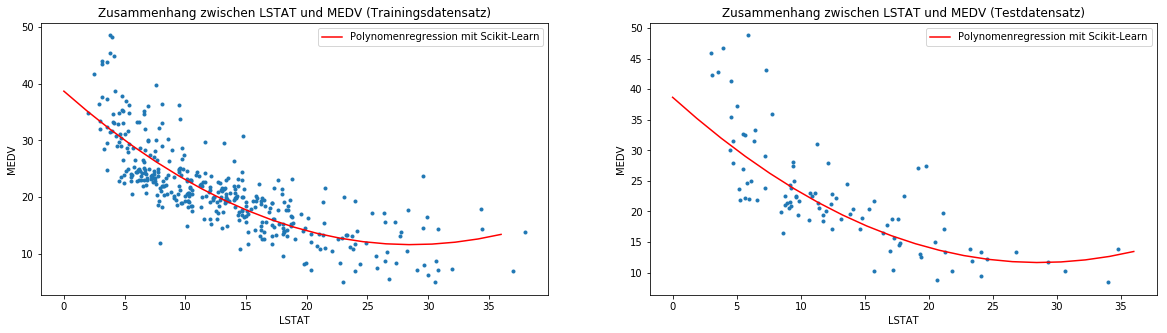

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

x_ = np.linspace(0, 36, 20).reshape(20, 1)
x_poly = poly.transform(x_)
y_ = modell.predict(x_poly)

ax1.scatter(train["LSTAT"], train["MEDV"], marker = ".", label = None)
ax1.plot(x_, y_, color = "red", label = "Polynomenregression mit Scikit-Learn")
ax2.scatter(test["LSTAT"], test["MEDV"], marker = ".", label = None)
ax2.plot(x_, y_, color = "red", label = "Polynomenregression mit Scikit-Learn")

ax1.set_title("Zusammenhang zwischen LSTAT und MEDV (Trainingsdatensatz)")
ax2.set_title("Zusammenhang zwischen LSTAT und MEDV (Testdatensatz)")
ax1.set_xlabel("LSTAT"); ax2.set_xlabel("LSTAT")
ax1.set_ylabel("MEDV"); ax2.set_ylabel("MEDV")
ax1.legend(); ax2.legend();

Scikit-Learn bietet uns auch die Möglichkeit, uns den MAE und den MSE für unsere Schätzungen ausgeben zu lassen. Für den MAE rufen wir die mean_absolute_error-Funktion auf:

In [43]:
from sklearn.metrics import mean_absolute_error

print("MAE des Trainingsfehlervektors: ", mean_absolute_error(modell.predict(X_train_poly), y_train))
print("MAE des Testfehlervektors: ", mean_absolute_error(modell.predict(X_test_poly), y_test))

MAE des Trainingsfehlervektors:  3.32909068839371
MAE des Testfehlervektors:  3.914472218942781


Wollen wir den RMSE bestimmen, müssen wir die Wurzel des Rückgabewerts der mean_squared_error-Funktion ziehen, da Scikit-Learn uns keine eigene Funktion für den RMSE anbietet:

In [44]:
from sklearn.metrics import mean_squared_error

print("RMSE des Trainingsfehlervektors: ", np.sqrt(mean_squared_error(modell.predict(X_train_poly), y_train)))
print("RMSE des Testfehlervektors: ", np.sqrt(mean_squared_error(modell.predict(X_test_poly), y_test)))

RMSE des Trainingsfehlervektors:  4.356690564816085
RMSE des Testfehlervektors:  5.495147807923708


### Polynomenregression selbst implementieren

Eine eigene Implementierung der obigen Polynomenregression ist in nur wenigen Zeilen Code möglich. Zunächst erzeugen wir die passenden Trainings- und Testmatrizen:

In [45]:
X_train = np.array(train["LSTAT"]).reshape(train["LSTAT"].size, 1)
y_train = np.array(train["MEDV"]).reshape(train["MEDV"].size, 1)

X_test = np.array(test["LSTAT"]).reshape(test["LSTAT"].size, 1)
y_test = np.array(test["MEDV"]).reshape(test["MEDV"].size, 1)

X_train_poly = np.c_[np.ones(X_train.shape[0]), X_train, X_train**2]
X_test_poly = np.c_[np.ones(X_test.shape[0]), X_test, X_test**2]

Dann rufen wir zur Parameterbestimmung die normal_equation-Funktion auf, die wir zu einem früheren Zeitpunkt definiert haben:

In [46]:
theta = normal_equation(X_train_poly, y_train)
for i in range(3):
    print("Theta_{}: ".format(i), round(float(theta[i]), 2))

Theta_0:  38.68
Theta_1:  -1.89
Theta_2:  0.03


Wir erzeugen uns die Trainings- und Testfehlervektoren:

In [47]:
epsilon_train = X_train_poly @ theta - y_train
epsilon_test =  X_test_poly @ theta - y_test

Und wir lassen uns abschließend den MAE und den RMSE für die beiden Fehlervektoren ausgeben:

In [48]:
print("MAE des Trainingsfehlervektors: ", MAE(epsilon_train))
print("MAE des Testfehlervektors: ", MAE(epsilon_test))
print("-----------------------------------------------")
print("RMSE des Trainingsfehlervektors: ", RMSE(epsilon_train))
print("RMSE des Testfehlervektors: ", RMSE(epsilon_test))

MAE des Trainingsfehlervektors:  3.3290906883937152
MAE des Testfehlervektors:  3.9144722189427763
-----------------------------------------------
RMSE des Trainingsfehlervektors:  4.356690564816085
RMSE des Testfehlervektors:  5.495147807923703


## Over- und Underfitting

### Zu simple vs. zu komplexe Modelle

In [49]:
def createData(N):
    seed = np.random.RandomState(0)
    x = 4 * seed.rand(N)
    y = 2.5 * x**2 - 6.5 * x + 3 + seed.randn(N)
    return x, y

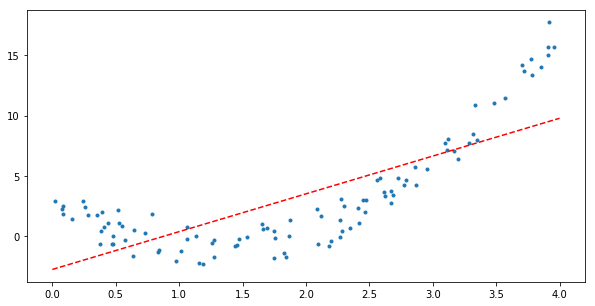

In [50]:
N = 100
x, y = createData(N)

from sklearn.linear_model import LinearRegression

underfittingModell = LinearRegression(fit_intercept = True)
X = x.reshape(N,1)
underfittingModell.fit(X, y)

x_ = np.linspace(0, 4, 2).reshape(2, 1)
y_ = underfittingModell.predict(x_)

plt.figure(figsize = (10, 5))
plt.plot(x, y , ".")
plt.plot(x_, y_, "--r");

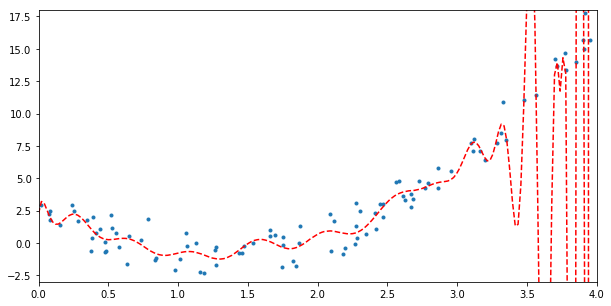

In [51]:
N = 100
x, y = createData(N)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

polynome = PolynomialFeatures(degree = 150, include_bias = False)
skalierer = StandardScaler()
linearesModell = LinearRegression()
overfittingModell = Pipeline([("p", polynome),
                              ("s", skalierer),
                              ("l", linearesModell)])

X = x.reshape(N,1)
overfittingModell.fit(X, y)

x_ = np.linspace(0, 4, 200).reshape(200, 1)
y_ = overfittingModell.predict(x_)

plt.figure(figsize = (10, 5))
plt.plot(X, y, ".")
plt.plot(x_, y_, "--r")
plt.axis([0, 4, -3, 18]);

### Over- und Underfitting über Fehlermetriken detektieren

In [52]:
N = 40
x, y = createData(N)
x = x.reshape(N, 1)
y = y.reshape(N, 1)
daten = np.hstack([x, y])
datensatz = pd.DataFrame({"x": daten[:,0],
                          "y": daten[:,1]})
print(datensatz.head())

          x         y
0  2.195254 -0.109086
1  2.860757  2.884113
2  2.411054  1.513188
3  2.179533  0.865294
4  1.694619  0.394601


In [53]:
from sklearn.model_selection import train_test_split

trainingSet, testSet = train_test_split(datensatz, test_size = 0.2, random_state = 0)

In [54]:
print(trainingSet.head())
print("Länge: ", len(trainingSet))

           x          y
18  3.112627   6.093575
29  1.658648  -1.262983
27  3.778676  13.771842
35  2.470542   2.663204
37  2.467736   2.235964
Länge:  32


In [55]:
print(testSet.head())
print("Länge: ", len(testSet))

           x          y
22  1.845917  -0.508118
20  3.914473  15.352872
25  2.559684   3.044482
4   1.694619   0.394601
10  3.166900   5.782020
Länge:  8


MSE:  9.434083154577985


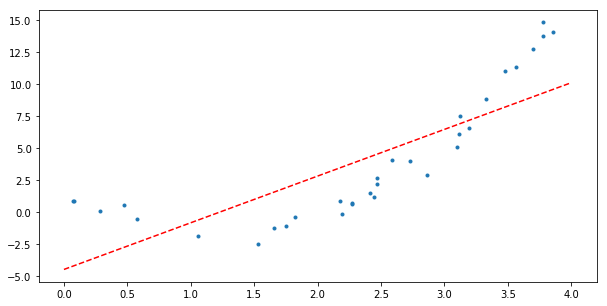

In [56]:
from sklearn.linear_model import LinearRegression

underfittingModell = LinearRegression(fit_intercept = True)
X = np.array(trainingSet["x"]).reshape(len(trainingSet["x"]), 1)
underfittingModell.fit(X, trainingSet["y"])

x_ = np.linspace(0, 4, 2).reshape(2, 1)
y_ = underfittingModell.predict(x_)

plt.figure(figsize = (10, 5))
plt.plot(trainingSet["x"], trainingSet["y"], ".")
plt.plot(x_, y_, "--r");

from sklearn.metrics import mean_squared_error

print("MSE: ", mean_squared_error(trainingSet["y"], underfittingModell.predict(X)))

MSE:  10.402666921212491


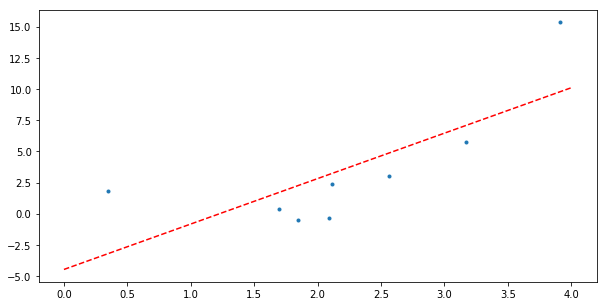

In [57]:
plt.figure(figsize = (10, 5))
plt.plot(testSet["x"], testSet["y"], ".")
plt.plot(x_, y_, "--r");

testx_ = underfittingModell.predict(np.array(testSet["x"]).reshape(len(testSet["x"]), 1))
print("MSE: ", mean_squared_error(testSet["y"], testx_))

MSE:  0.03856547250029766


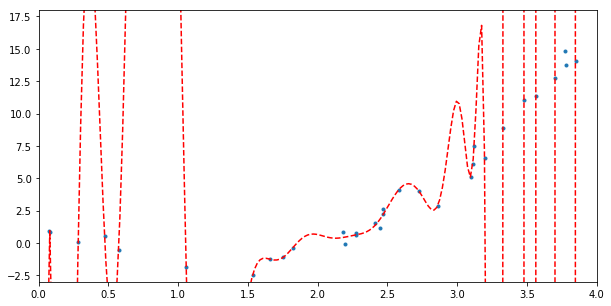

In [58]:
polynome = PolynomialFeatures(degree = 150, include_bias = False)
skalierer = StandardScaler()
linearesModell = LinearRegression()
overfittingModell = Pipeline([("p", polynome),
                              ("s", skalierer),
                              ("l", linearesModell)])

X = np.array(trainingSet["x"]).reshape(int(N*0.8), 1)
overfittingModell.fit(X, trainingSet["y"])


x_ = np.linspace(0, 4, 200).reshape(200, 1)
y_ = overfittingModell.predict(x_)

plt.figure(figsize = (10, 5))
plt.plot(trainingSet["x"], trainingSet["y"], ".")
plt.plot(x_, y_, "--r")
plt.axis([0, 4, -3, 18]);

print("MSE: ", mean_squared_error(trainingSet["y"], overfittingModell.predict(X)))

MSE:  5.468228069446882e+20


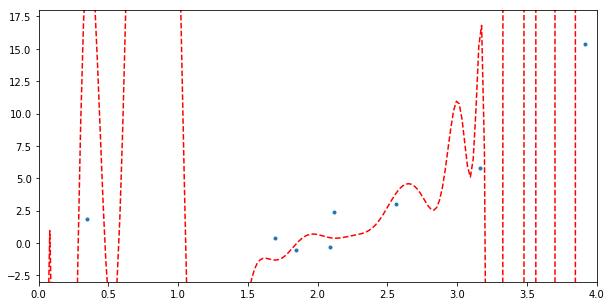

In [59]:
plt.figure(figsize = (10, 5))
plt.plot(testSet["x"], testSet["y"], ".")
plt.plot(x_, y_, "--r")
plt.axis([0, 4, -3, 18]);

testx_ = overfittingModell.predict(np.array(testSet["x"]).reshape(len(testSet["x"]), 1))
print("MSE: ", mean_squared_error(testSet["y"], testx_))

### Lernkurven visualisieren

In [60]:
def lernkurve(modell, X, y):
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)
    trainErrors, testErrors = [], []
    for i in range(1, len(xTrain)):
        modell.fit(xTrain[:i], yTrain[:i])
        yTrain_predict = modell.predict(xTrain[:i])
        yTest_predict = modell.predict(xTest)
        trainErrors.append(mean_squared_error(yTrain[:i], yTrain_predict))
        testErrors.append(mean_squared_error(yTest, yTest_predict))

    plt.figure(figsize = (10, 5))
    plt.plot(np.sqrt(trainErrors), "r--", label="train")
    plt.plot(np.sqrt(testErrors), "b--", label="val")
    plt.legend(loc="lower right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("MSE", fontsize=14)

In [61]:
N = 130
x, y = createData(N)
x = x.reshape(N, 1)
y = y.reshape(N, 1)

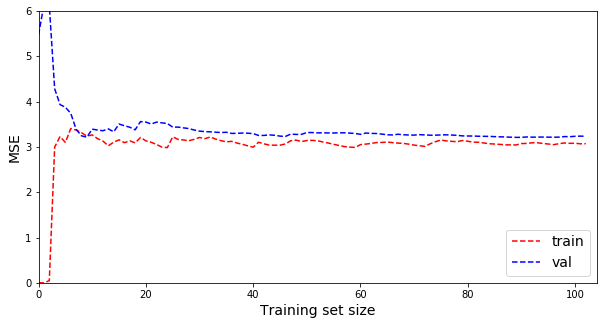

In [62]:
lin_reg = LinearRegression()
lernkurve(lin_reg, x, y)
plt.axis([0, 0.8*len(x), 0, 6]);

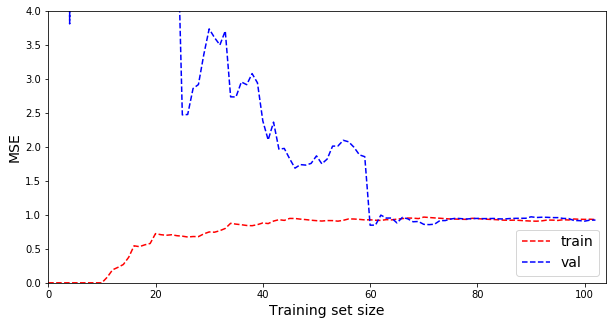

In [63]:
polynome = PolynomialFeatures(degree = 10, include_bias = False)
linearesModell = LinearRegression()
overfittingModell = Pipeline([("p", polynome),
                              ("l", linearesModell)])

lernkurve(overfittingModell, x, y)
plt.axis([0, 0.8*len(x), 0, 4]);

## Multiple lineare Regression

### Multiple lineare Regression mit Scikit-Learn

In [64]:
X_train_RM = np.array(train["RM"]).reshape(train["RM"].size, 1)
X_train_LSTAT = np.array(train["LSTAT"]).reshape(train["LSTAT"].size, 1)
y_train = np.array(train["MEDV"]).reshape(train["MEDV"].size, 1)

X_test_RM = np.array(test["RM"]).reshape(test["RM"].size, 1)
X_test_LSTAT = np.array(test["LSTAT"]).reshape(test["LSTAT"].size, 1)
y_test = np.array(test["MEDV"]).reshape(test["MEDV"].size, 1)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_LSTAT_poly = poly.fit_transform(X_train_LSTAT)
X_test_LSTAT_poly = poly.fit_transform(X_test_LSTAT)

X_train = np.c_[X_train_RM, X_train_LSTAT_poly]
X_test = np.c_[X_test_RM, X_test_LSTAT_poly]

In [65]:
modell = LinearRegression()
modell.fit(X_train, y_train)

print("Koeffizienten: ", modell.coef_)
print("Y-Achsenabschnitt: ", modell.intercept_)

Koeffizienten:  [[ 3.55191715 -1.54746202  0.02857845]]
Y-Achsenabschnitt:  [13.13525816]


In [66]:
epsilon_train = modell.predict(X_train) - y_train
epsilon_test = modell.predict(X_test) - y_test

print("RMSE beim Trainingset: ", round(RMSE(epsilon_train), 2))
print("RMSE beim Testset: ", round(RMSE(epsilon_test), 2))

RMSE beim Trainingset:  4.0
RMSE beim Testset:  4.95


### Multiple lineare Regression visualisieren

In [67]:
from mpl_toolkits.mplot3d import Axes3D

X = df[["RM", "LSTAT"]]
xx1, xx2 = np.meshgrid(np.linspace(X.RM.min(), X.RM.max(), 20), 
                       np.linspace(X.LSTAT.min(), X.LSTAT.max(), 20))

Z = modell.intercept_[0] + modell.coef_[0][0]*xx1 + modell.coef_[0][1]*xx2 + modell.coef_[0][2]*xx2**2

<IPython.core.display.Javascript object>


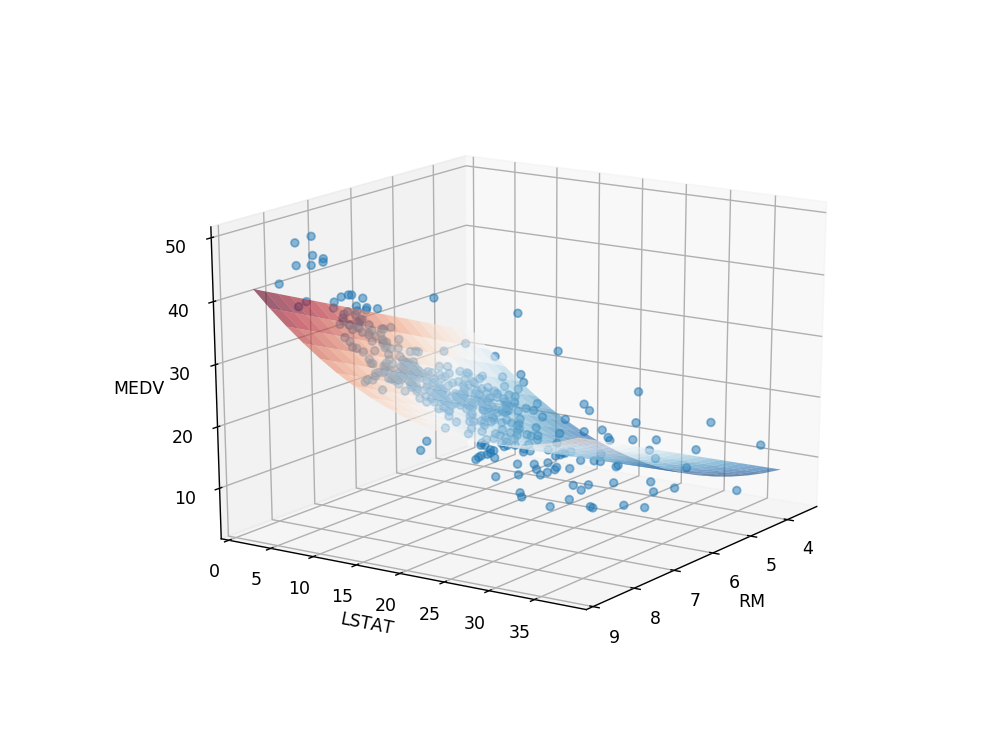

In [75]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_train_RM, X_train_LSTAT, y_train, marker = "o", alpha = 0.5)
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("MEDV");

<IPython.core.display.Javascript object>


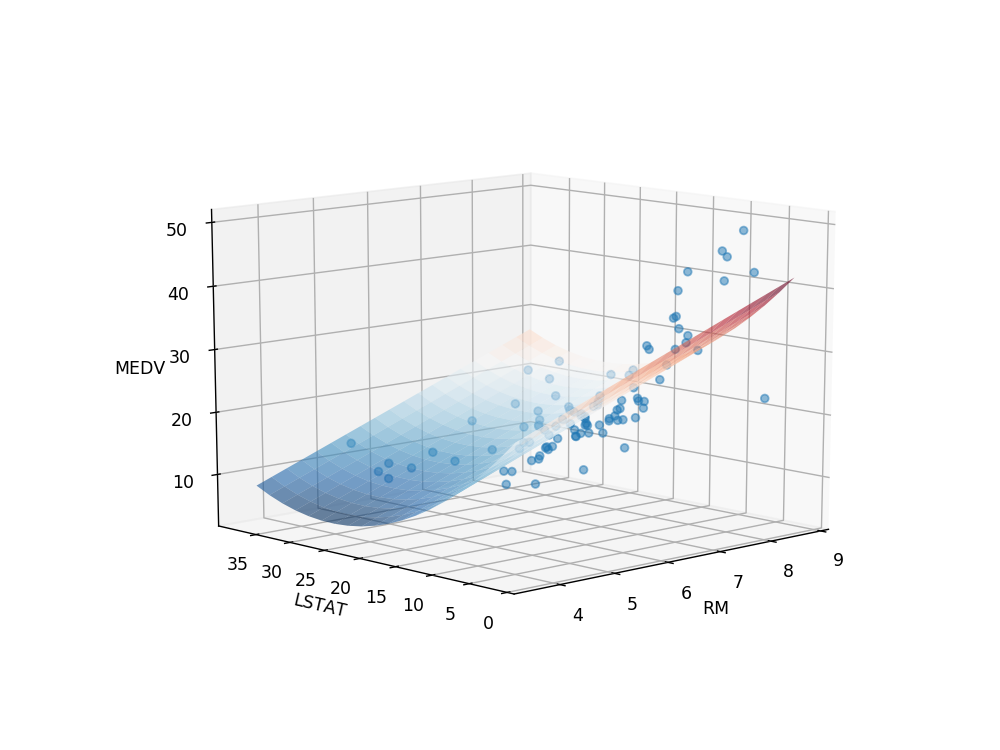

In [76]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_test_RM, X_test_LSTAT, y_test, marker = "o", alpha = 0.5)
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("MEDV");

### Multiple lineare Regression selbst implementieren

In [70]:
X_train_RM = np.array(train["RM"]).reshape(train["RM"].size, 1)
X_train_LSTAT = np.array(train["LSTAT"]).reshape(train["LSTAT"].size, 1)
y_train = np.array(train["MEDV"]).reshape(train["MEDV"].size, 1)

X_test_RM = np.array(test["RM"]).reshape(test["RM"].size, 1)
X_test_LSTAT = np.array(test["LSTAT"]).reshape(test["LSTAT"].size, 1)
y_test = np.array(test["MEDV"]).reshape(test["MEDV"].size, 1)

X_train_poly = np.c_[X_train_LSTAT, X_train_LSTAT**2]
X_test_poly = np.c_[X_test_LSTAT, X_test_LSTAT**2]

X_train = np.c_[np.ones(X_train.shape[0]), X_train_RM, X_train_poly]
X_test = np.c_[np.ones(X_test.shape[0]), X_test_RM, X_test_poly]

In [71]:
theta = normal_equation(X_train, y_train)
for i in range(4):
    print("Theta_{}: ".format(i), round(float(theta[i]), 2))

Theta_0:  13.14
Theta_1:  3.55
Theta_2:  -1.55
Theta_3:  0.03


In [72]:
epsilon_train = X_train @ theta - y_train
epsilon_test =  X_test @ theta - y_test

In [73]:
print("MAE des Trainingsfehlervektors: ", MAE(epsilon_train))
print("MAE des Testfehlervektors: ", MAE(epsilon_test))
print("-----------------------------------------------")
print("RMSE des Trainingsfehlervektors: ", RMSE(epsilon_train))
print("RMSE des Testfehlervektors: ", RMSE(epsilon_test))

MAE des Trainingsfehlervektors:  3.08305053120057
MAE des Testfehlervektors:  3.7360301829516596
-----------------------------------------------
RMSE des Trainingsfehlervektors:  3.9998503183130882
RMSE des Testfehlervektors:  4.950021457961165
